<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>ONLINE SHOPPERS PURCHASING INTENSION</b></u>
</div>

<div style="text-align: center; font-size: 20px; color: red;">
    <b>SEETHA V</b>
</div>

<div style="text-align: center; font-size: 35px; color: red;">
    <u><b>OVERVIEW OF THE PROJECT</b></u>
</div>

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>PROBLEM STATEMENT</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>The primary objective of this project is to analyze the Online Shoppers' Intention dataset to identify the factors influencing online shopping behavior and predict the likelihood of a visitor making a purchase, thereby driving revenue. This dataset includes various features that capture user interactions on an e-commerce platform, such as page views, time spent on different page types, and visitor characteristics. By leveraging these insights, the project aims to optimize marketing strategies and enhance the user experience on online shopping platforms. </p>    
</div>

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>GOAL</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>The objective of this project is to predict the purchase intent of online shoppers based on their browsing behaviors and interactions with the website. Specifically, the goal is to classify whether a visitor will make a purchase (Revenue = TRUE) or not (Revenue = FALSE) by analyzing various features derived from their online activities. </p>    
</div>

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>SOURCE</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>The dataset can be downloaded from the link : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset</p>    
</div>

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>FEATURES</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><b>*  Administrative:</b> Number of administrative pages viewed by the visitor.</p>
    <p><b>*  Administrative_Duration:</b> Total time (in seconds) spent on administrative pages.</p>
    <p><b>*  Informational:</b> Number of informational pages viewed.</p>
    <p><b>*  Informational_Duration:</b> Total time (in seconds) spent on informational pages.</p>
    <p><b>*  ProductRelated:</b> Number of product-related pages viewed during the session.</p>
    <p><b>*  ProductRelated_Duration:</b>Total time (in seconds) spent on product-related pages.</p>
    <p><b>*  BounceRates:</b> The percentage of visitors who leave the site after viewing only one page.</p>
    <p><b>*  ExitRates:</b> The percentage of visitors who exit from a specific page.</p>
    <p><b>*  PageValues:</b> Average value of a page based on conversion rates, indicating its contribution to revenue generation.</p>
    <p><b>*  SpecialDay:</b> A binary indicator that specifies if the visit occurred on a special day (e.g., holiday).</p>
    <p><b>*  Month:</b> The month during which the visit occurred, represented as a categorical variable.</p>
    <p><b>*  OperatingSystems:</b> The type of operating system used by the visitor (e.g., Windows, macOS).</p>
    <p><b>*  Browser:</b> The web browser used by the visitor (e.g., Chrome, Firefox).</p>
    <p><b>*  Region:</b> Geographic region from which the visitor accessed the site.</p>
    <p><b>*  TrafficType:</b> Type of traffic source (e.g., direct, referral).</p>
    <p><b>*  VisitorType:</b> Indicates whether the visitor is a new or returning user.</p>
    <p><b>*  Weekend:</b> A binary indicator that denotes if the visit occurred on a weekend.</p>
    <p><b>*  Revenue:</b> A binary outcome variable indicating whether the visit resulted in revenue generation (1 for yes, 0 for no). </p>    
</div>

<div style="text-align: center; font-size: 35px; color: red;">
    <u><b>IMPORTING LIBRARIES</b></u>
</div>

In [147]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>LOADING & PREPROCESSING</b></u>
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>1. LOAD THE DATA</b>
</div>

In [150]:
data = pd.read_csv("online_shoppers_intention.csv")
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [151]:
data.shape

(12330, 18)

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>2. DISPLAY FIRST & LAST ROWS</b>
</div>

In [153]:
# DISPLAY FIRST FEW ROWS TO UNDERSTAND THE STRUCTURE OF THE DATA
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [154]:
# DISPLAY LAST FEW ROWS TO UNDERSTAND THE STRUCTURE OF THE DATA
print(data.tail())

       Administrative  Administrative_Duration  Informational  \
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>3. DATATYPE OF EACH COLUMN</b>
</div>

In [156]:
# DISPLAY DATA TYPE OF EACH COLUMN
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficT

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>4. STATISTICAL SUMMARY OF DATA</b>
</div>

In [158]:
# DISPLAY STATISTICAL SUMMARY 
print("Statistical Summary:")
data.describe()

Statistical Summary:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>5. DISPLAY ALL COLUMN NAMES</b>
</div>

In [160]:
# DISPLAY PARTICULAR COLUMN
print("Columns of the dataset:")
data.columns

Columns of the dataset:


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>6. NULL / MISSING VALUES IN EACH COLUMN</b>
</div>

In [162]:
# DISPLAY NULL VALUES IN EACH COLUMN
print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>7. DUPLICATE VALUES</b>
</div>

In [164]:
# FINDING THE TOTAL NO OF DUPLICATES
print(f"Total number of duplicate values is {data.duplicated().sum()}")

Total number of duplicate values is 125


In [165]:
data.shape

(12330, 18)

In [166]:
# TO REMOVE DUPLICATES
data.drop_duplicates(inplace=True)

In [167]:
print(f"The shape of the dataset after removing the duplicates is {data.shape}")

The shape of the dataset after removing the duplicates is (12205, 18)


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>8. UNIQUE VALUE IN EACH COLUMN AND ITS LENGTH</b>
</div>

In [169]:
for column in data.columns:
    unique_values = data[column].unique()  # Get unique values in the column
    unique_count = len(unique_values)  # Get the count of unique values
    print(f"COLUMN: {column}")
    print(f"UNIQUE VALUES: {unique_values}")
    print(f"COUNT OF UNIQUE VALUES: {unique_count}")
    print("\n")

COLUMN: Administrative
UNIQUE VALUES: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
COUNT OF UNIQUE VALUES: 27


COLUMN: Administrative_Duration
UNIQUE VALUES: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
COUNT OF UNIQUE VALUES: 3335


COLUMN: Informational
UNIQUE VALUES: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
COUNT OF UNIQUE VALUES: 17


COLUMN: Informational_Duration
UNIQUE VALUES: [  0.   120.    16.   ... 547.75 368.25 211.25]
COUNT OF UNIQUE VALUES: 1258


COLUMN: ProductRelated
UNIQUE VALUES: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>9. MAKE COPY OF DATASET</b>
</div>

In [171]:
data_copy = data.copy()
data_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>9. EXTRACT NUMERICAL COLUMNS</b>
</div>

In [173]:
num_data = data.select_dtypes(include="number")
num_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [174]:
num_data = data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>10. FIND SKEWNESS</b>
</div>

In [176]:
num_data.skew()

Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
dtype: float64

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>The skewness output from the numerical features in the Online Shoppers Purchasing' Intention dataset reveals significant insights into the distribution of various user interaction metrics. Most features exhibit positive skewness, indicating that while a majority of users display typical behavior (e.g., viewing fewer pages or spending less time), there are notable outliers who engage far more intensively. For instance, the Administrative_Duration and ProductRelated_Duration features show high skewness values of 5.59 and 7.25, respectively, suggesting that most visitors spend minimal time on administrative and product-related pages, while a small number spend an extraordinarily long time. Similarly, features like PageValues (skewness of 6.35) indicate that while many pages have low or no value, a few pages significantly contribute to revenue. This skewness highlights the need for targeted strategies to engage both typical users and high-engagement outliers effectively, as understanding these patterns can guide marketing efforts and improve overall conversion rates on the platform. </p>    
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>11. UNIVARIATE AND BIVARIATE ANALYSIS</b>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>11.1 Pie chart to represent the proportion of visitors who made a purchase (Revenue = TRUE) versus those who did not (Revenue = FALSE) in the dataset.</i></p>    
</div>

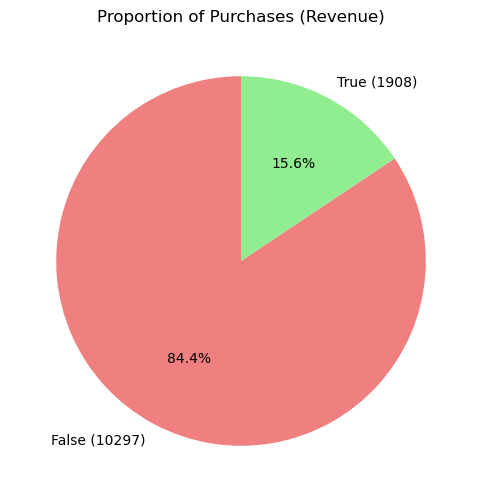

In [180]:
# Get value counts for the 'Revenue' column
counts = data["Revenue"].value_counts()

# Define labels with counts for Revenue
labels = [f"{idx} ({val})" for idx, val in counts.items()]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=["lightcoral", "lightgreen"], startangle=90)
plt.title("Proportion of Purchases (Revenue)")
plt.ylabel("")  # Hide y-label
plt.show()


<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>11.2 Column charts to determine the number of visitors across different features, such as Visitor Type, Traffic Type, Operating Systems, Browser, Region and Month.</i></p>
</div>

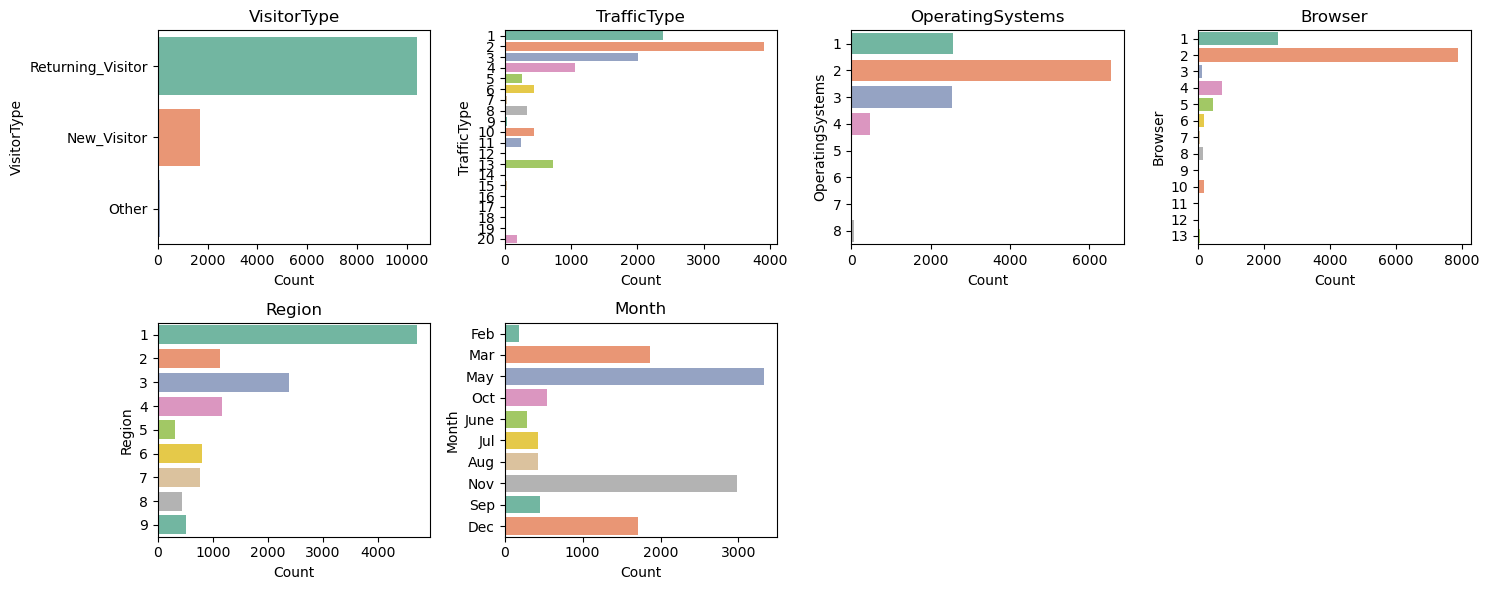

In [182]:
import math

# Define the categorical variables based on your dataset
categorical_vars = ["VisitorType", "TrafficType", "OperatingSystems", "Browser", "Region", "Month"]

# Dynamically determine number of rows and columns for subplots
num_vars = len(categorical_vars)
num_cols = 4  # Set fixed number of columns
num_rows = math.ceil(num_vars / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()  # Flatten for easy indexing

# Generate count plots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(y=var, data=data, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(var)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot spaces

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>11.3 Histogram to visualize distribution across all features.</i></p>
</div>

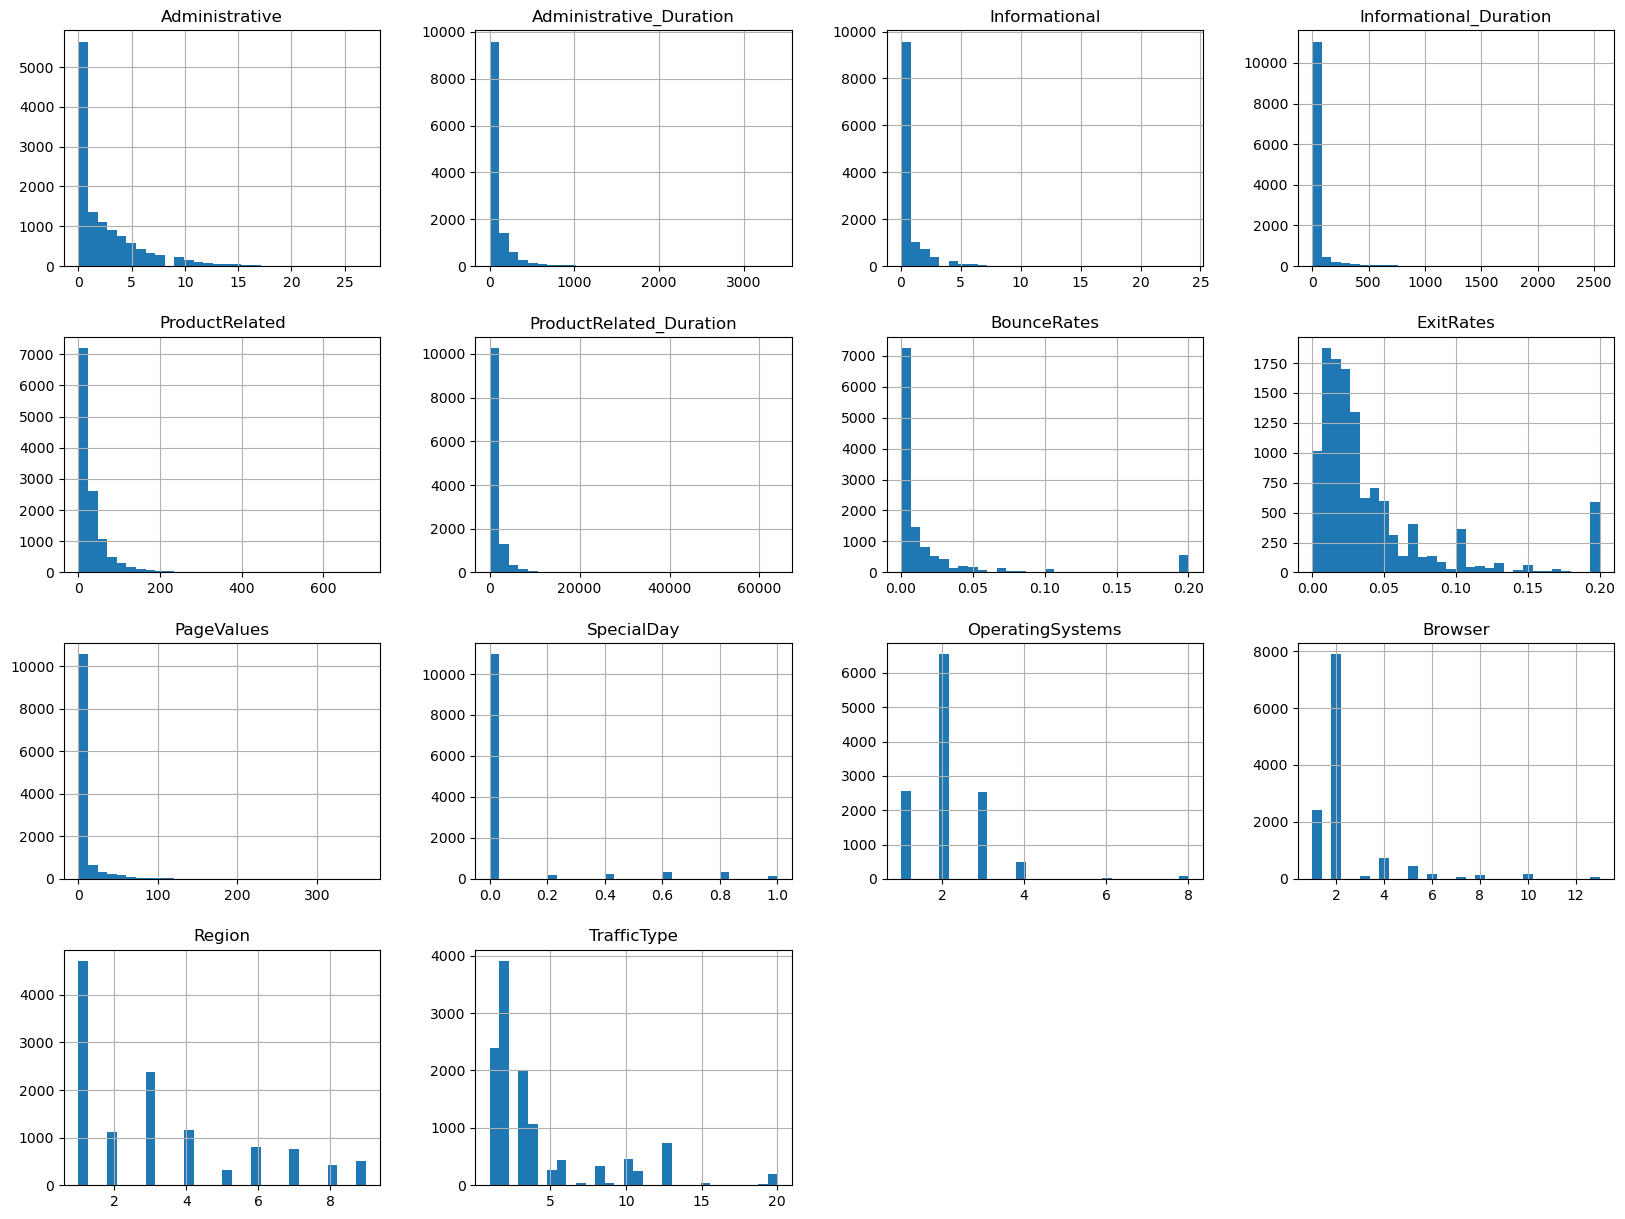

In [184]:
data.hist(figsize=(20, 15), bins=30)
plt.show()

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>11.4 Correlation Heatmap</i></p>
</div>

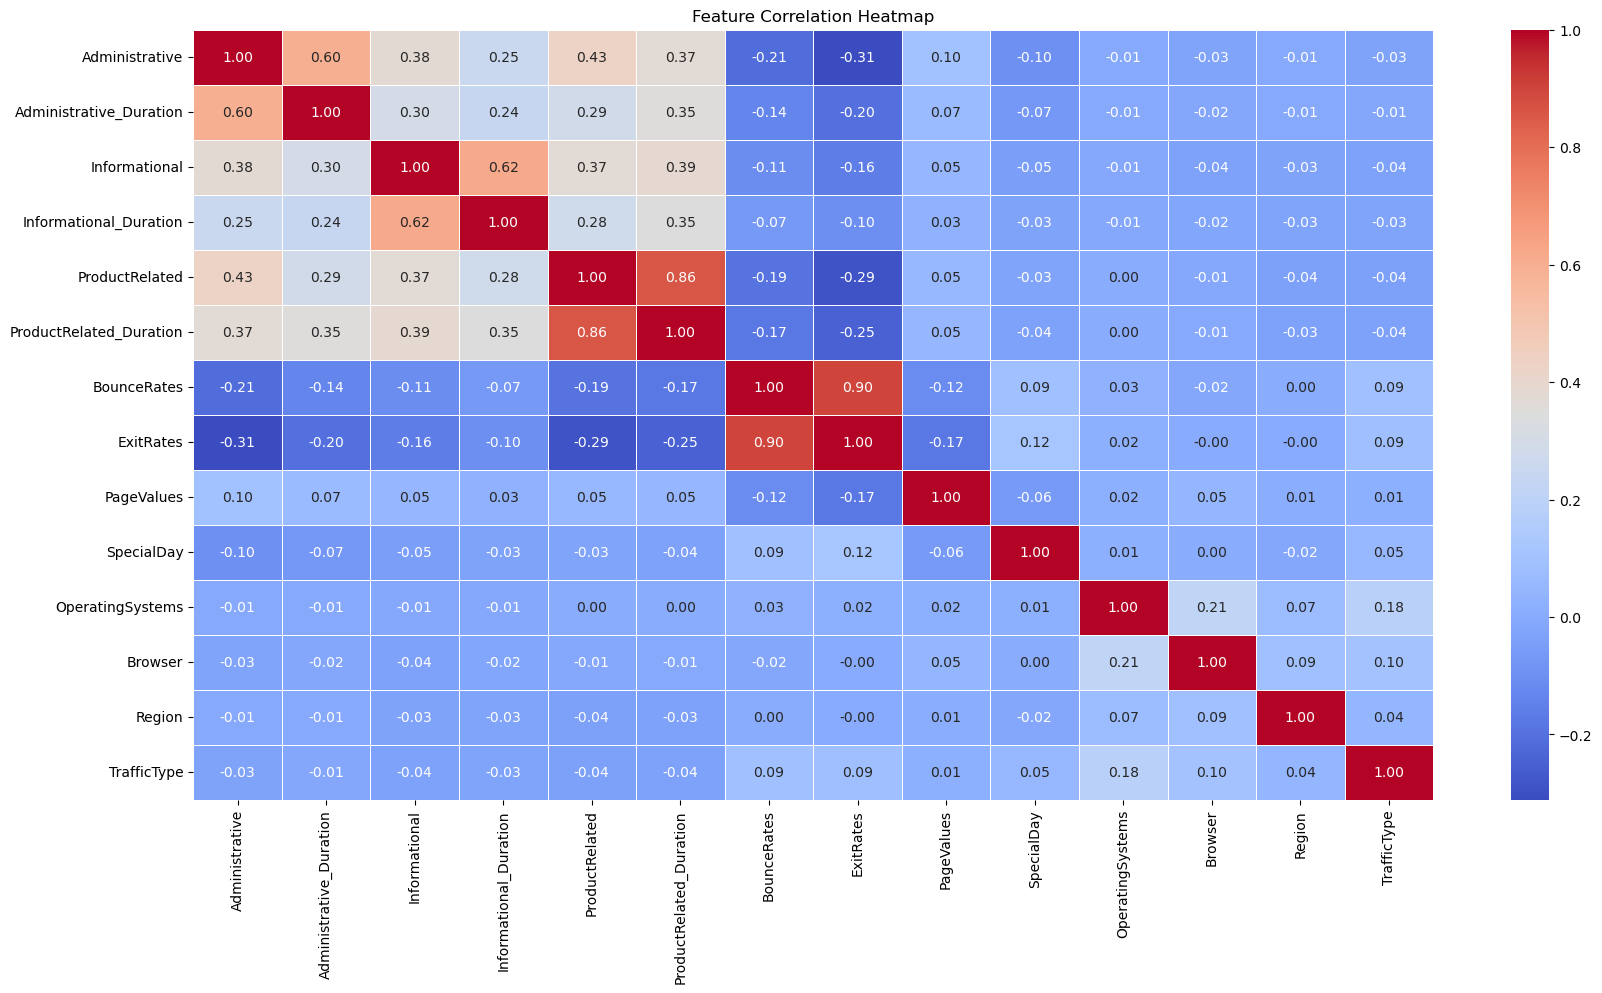

In [186]:
# Select only the numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix for numerical features
correlation_matrix = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>11.5 Visualization to analyze the purchase behavior (Revenue = TRUE or FALSE) amongst different types of visitors, such as Returning and New Visitors.</i></p>
</div>

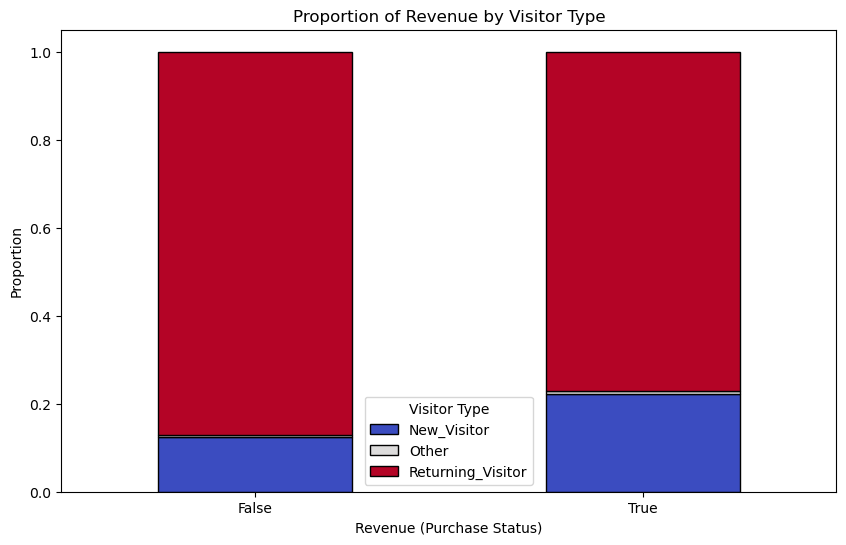

In [188]:
# Create a cross-tabulation for the 'Revenue' and 'VisitorType' columns
cross_tab = pd.crosstab(data["Revenue"], data["VisitorType"], normalize="index")

# Plot the stacked bar chart
cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor="black")

# Set the title and labels
plt.title("Proportion of Revenue by Visitor Type")
plt.xlabel("Revenue (Purchase Status)")
plt.ylabel("Proportion")
plt.legend(title="Visitor Type")
plt.xticks(rotation=0)  # Ensure x-axis labels are readable
plt.show()


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>12. HISTOGRAM AND BOX PLOT OF NUMERICAL COLUMNS</b>
</div>

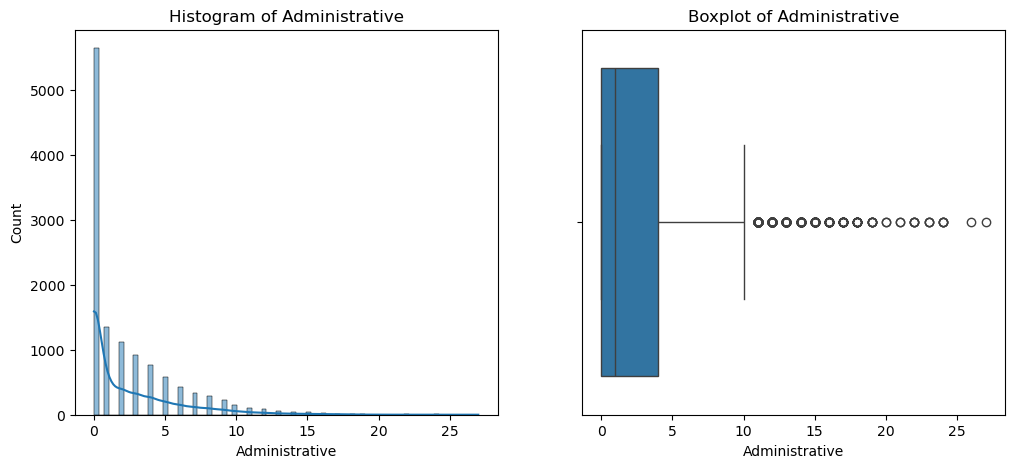

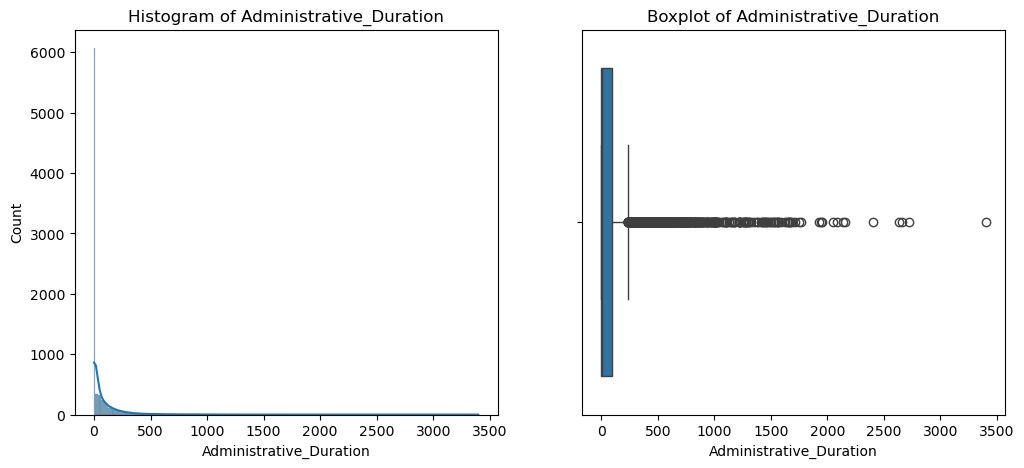

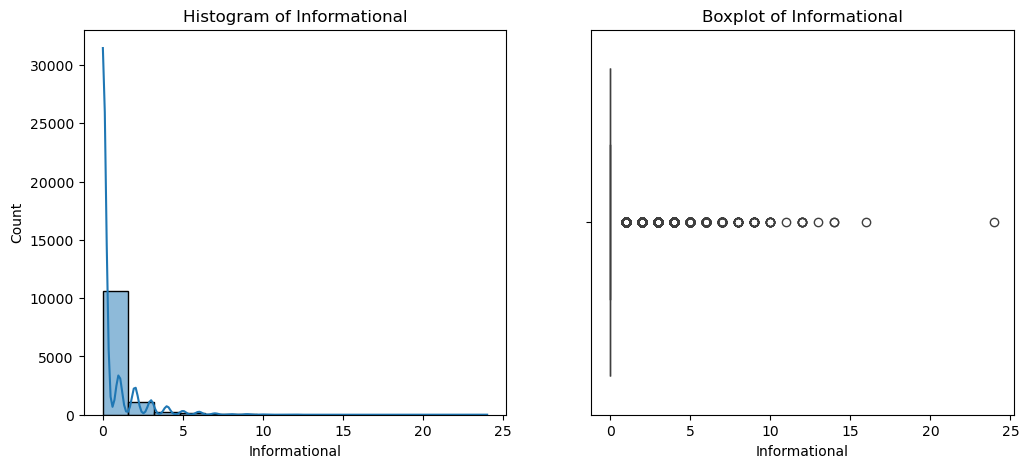

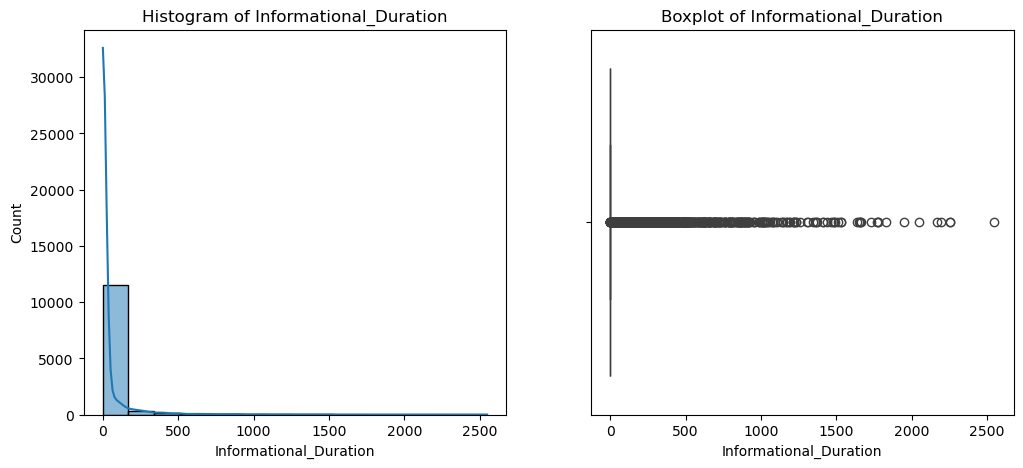

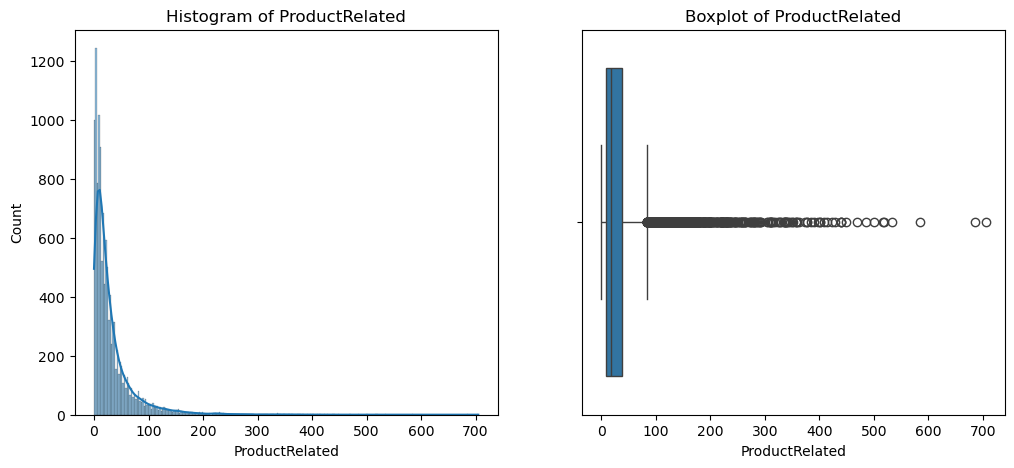

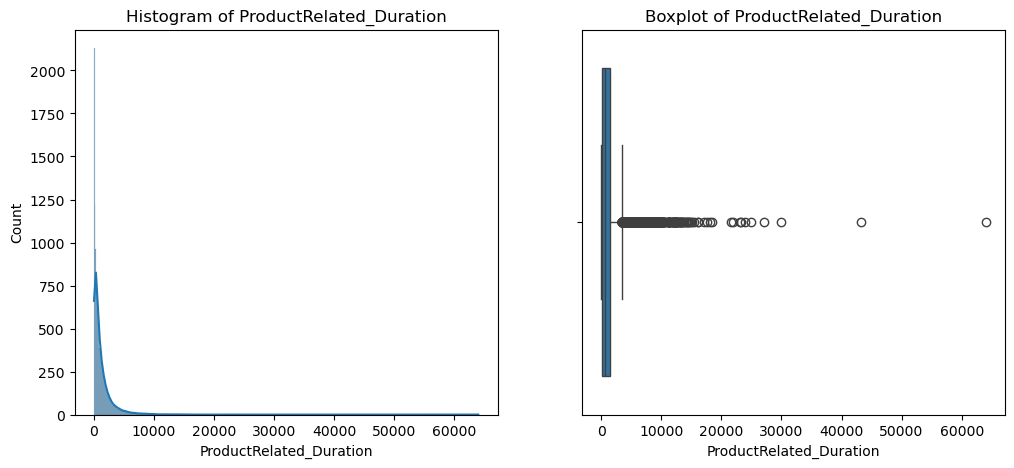

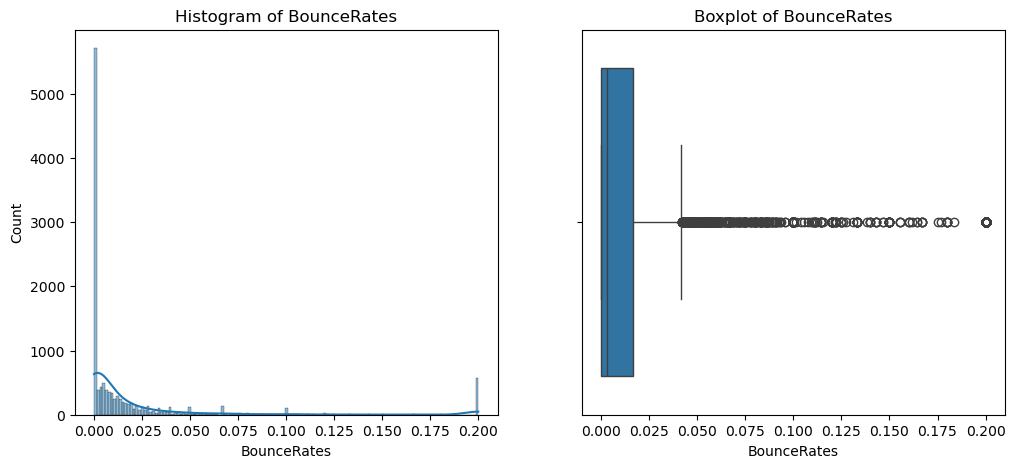

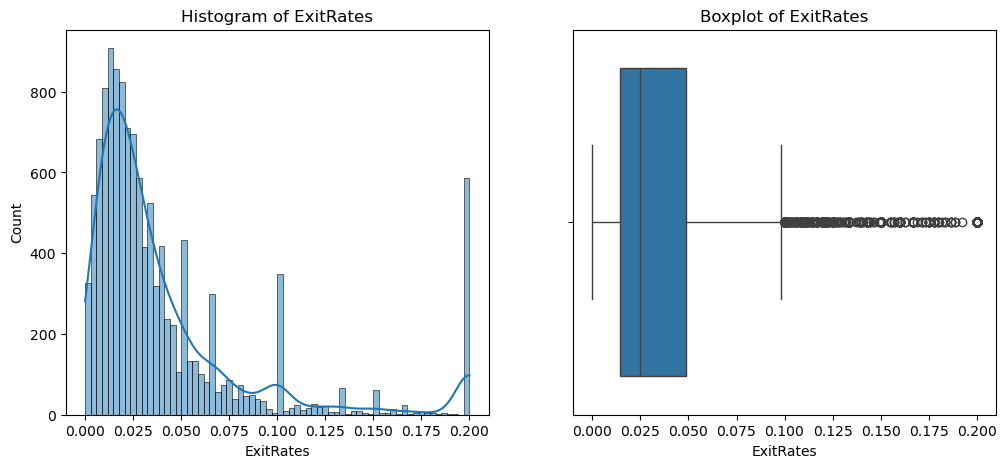

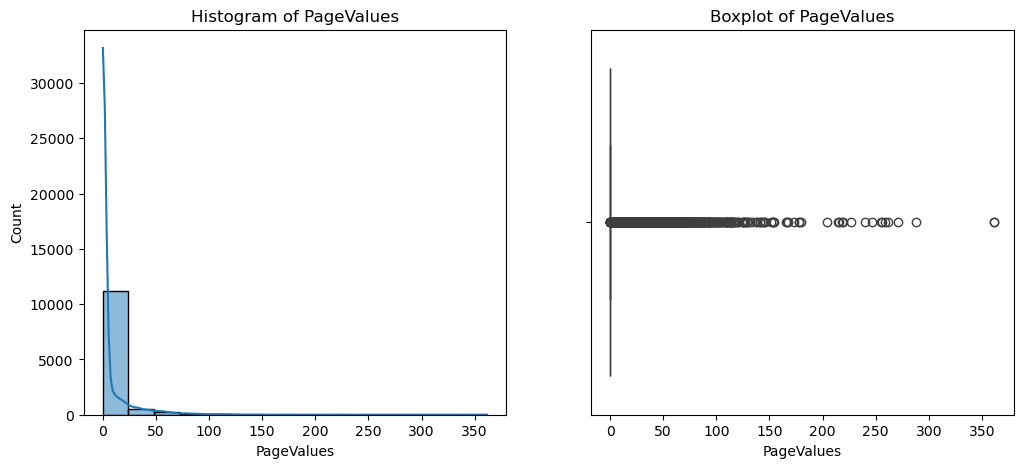

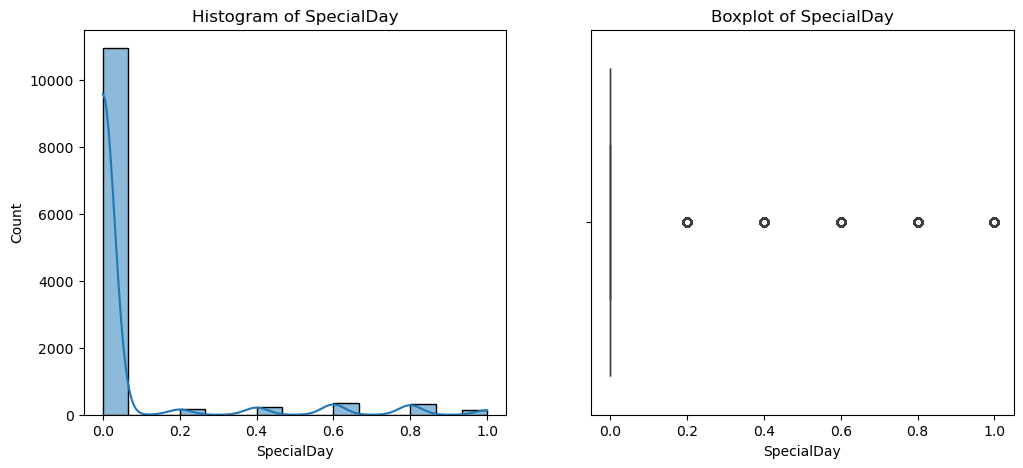

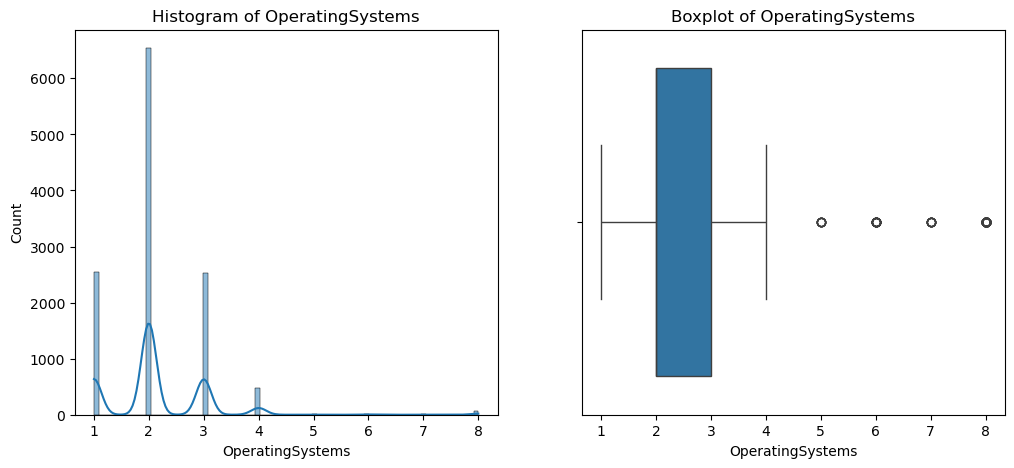

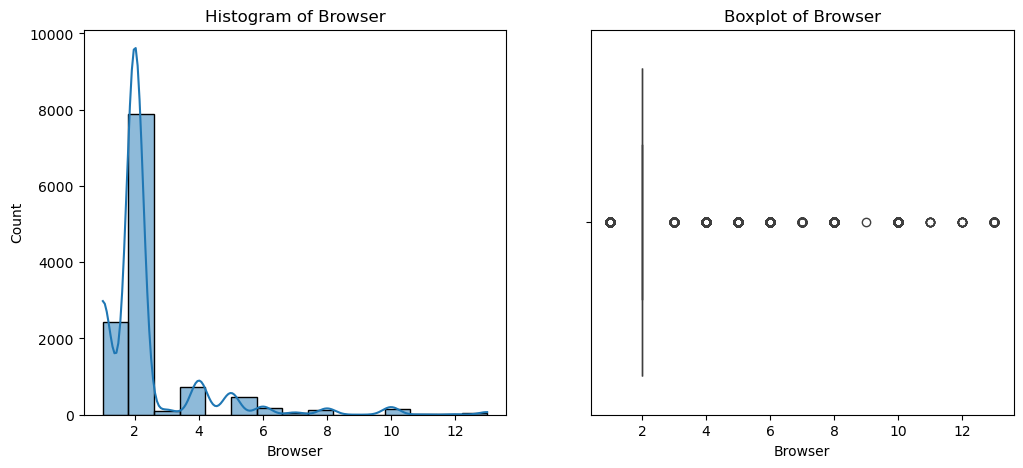

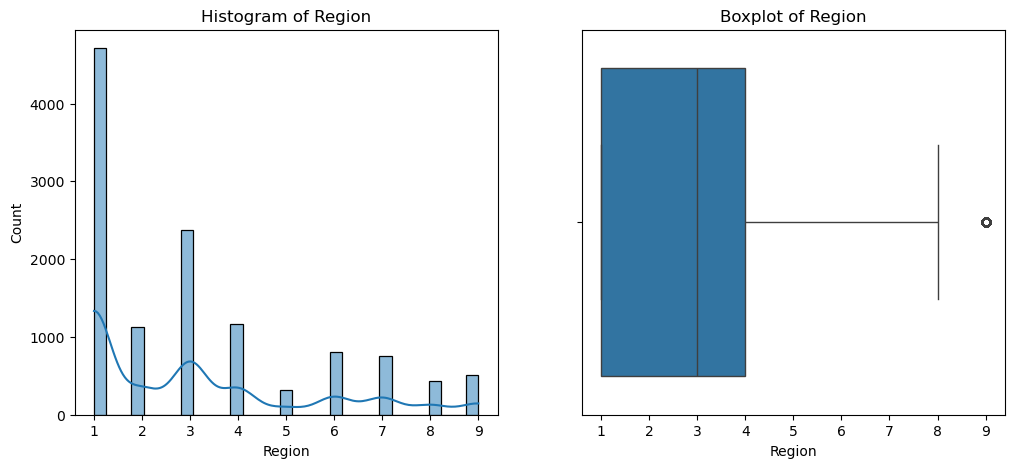

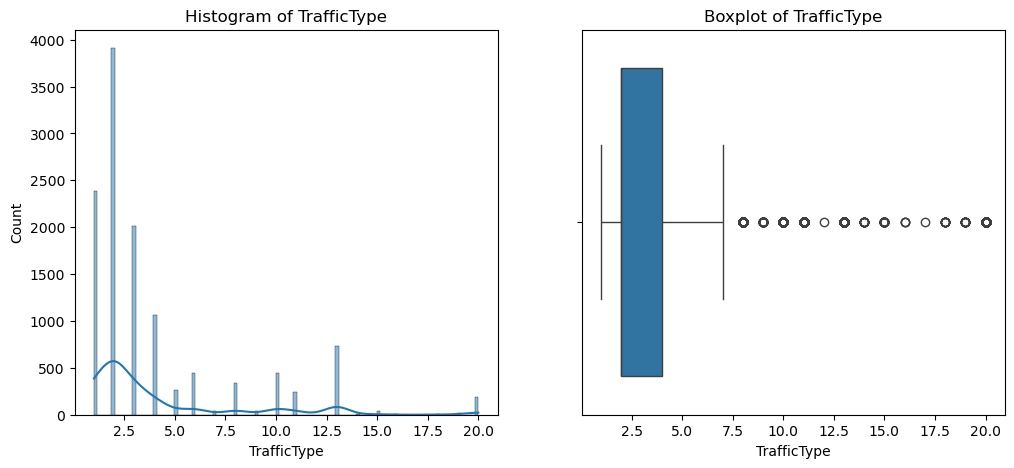

In [190]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>All numerical features in this dataset exhibit the presence of outliers and are positively skewed. </p>    
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>13. OUTLIER DETECTION</b>
</div>

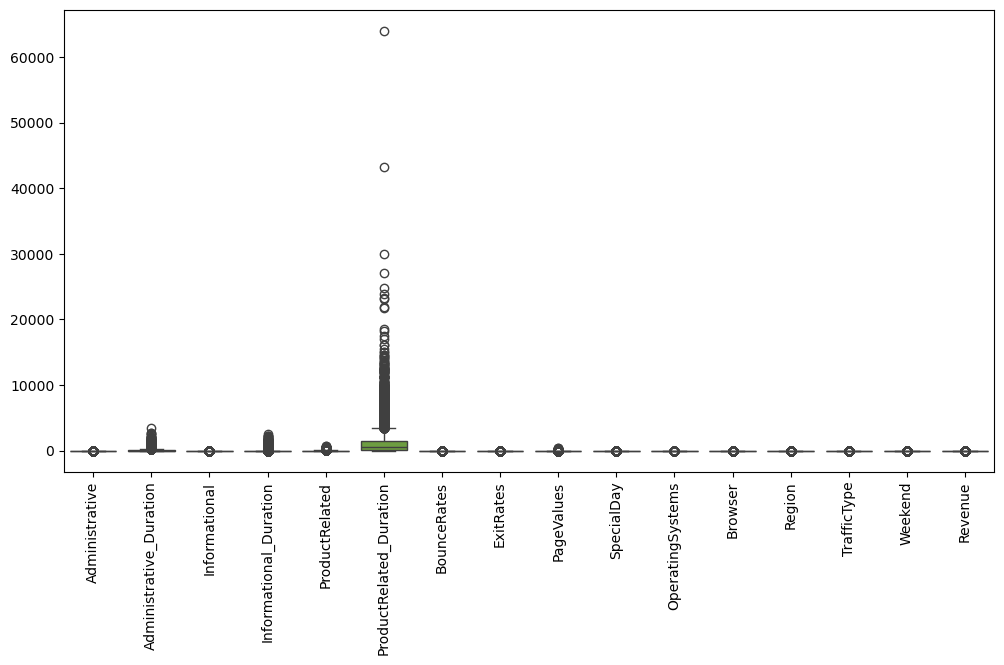

In [193]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>I will start by calculating the skewness and kurtosis of each feature to assess the appropriate method for further analysis.</p>    
</div>

In [195]:
import pandas as pd

# Select numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Compute skewness & kurtosis
skewness = data[num_cols].skew()
kurtosis = data[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurtosis})

# Reset index and sort by Skewness in descending order
normality_stats_sorted = normality_stats.reset_index().rename(columns={"index": "Feature"})
normality_stats_sorted = normality_stats_sorted.sort_values(by="Skewness", ascending=False)

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))


,Feature,Skewness,Kurtosis
3,Informational_Duration,7.5403,75.5342
5,ProductRelated_Duration,7.2532,136.6815
8,PageValues,6.3510,64.9980
1,Administrative_Duration,5.5922,50.1368
4,ProductRelated,4.3334,31.0727
2,Informational,4.0142,26.6593
9,SpecialDay,3.2859,9.7976
11,Browser,3.2174,12.5536
6,BounceRates,3.1624,9.3340
7,ExitRates,2.2346,4.6421


<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p> Based on the computed skewness values greater than 1 (indicating strong positive skew) and kurtosis values significantly above 3 (indicating heavy tails or a high peak), the data is non-normally distributed and likely contains outliers, so I will apply the IQR method for outlier detection to handle these features.</p>    
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>13.1 IQR METHOD</i></p>    
</div>

In [198]:
# Select numerical columns in your dataset
num_cols = data.select_dtypes(include=['number']).columns

# Compute the first and third quartiles (Q1, Q3)
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any feature is outside the bounds
data_iqr_removed = data[~((data[num_cols] < lower_bound) | (data[num_cols] > upper_bound)).any(axis=1)]

# Print the shapes before and after removing outliers
print(f"The shape of the dataset before removing outliers is {data.shape}")
print(f"The shape of the dataset after removing outliers is {data_iqr_removed.shape}")


The shape of the dataset before removing outliers is (12205, 18)
The shape of the dataset after removing outliers is (2459, 18)


<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p> Since IQR method has reduced the shape of the dataset significantly, I'll alternatively perform Z-score method for comparison.</p>    
</div>

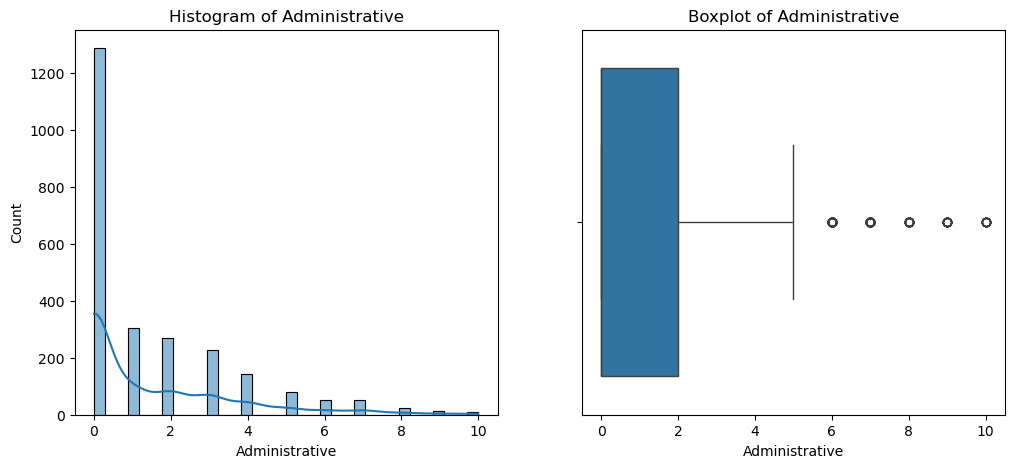

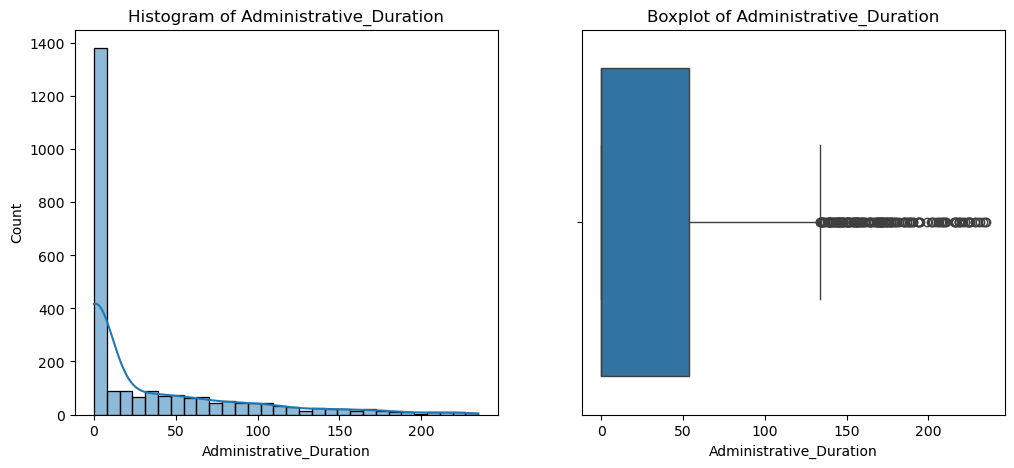

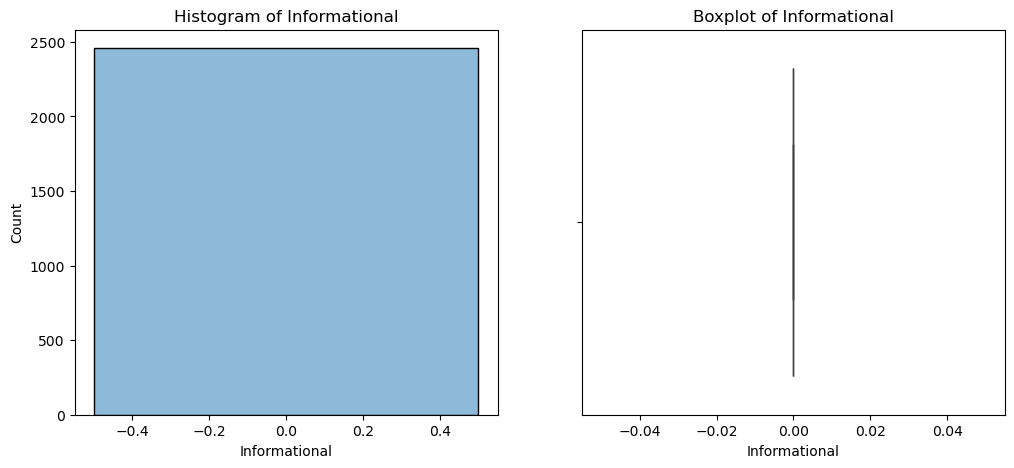

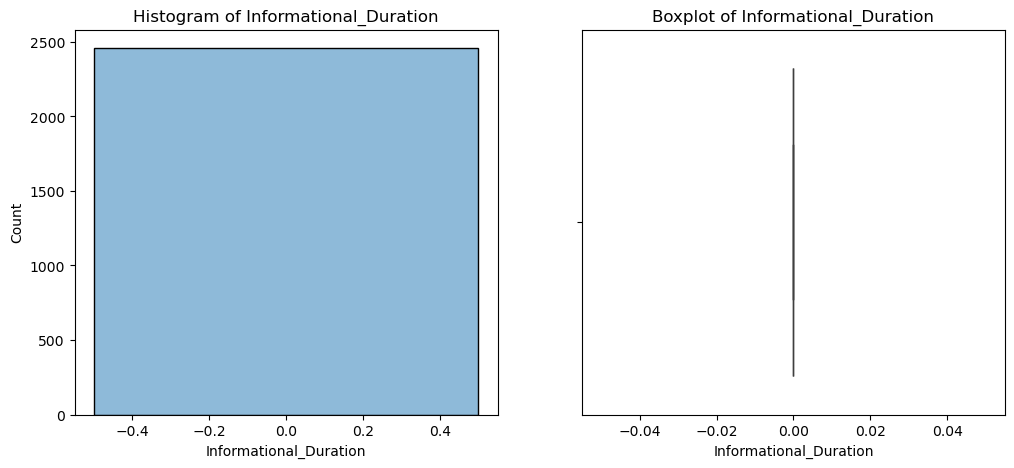

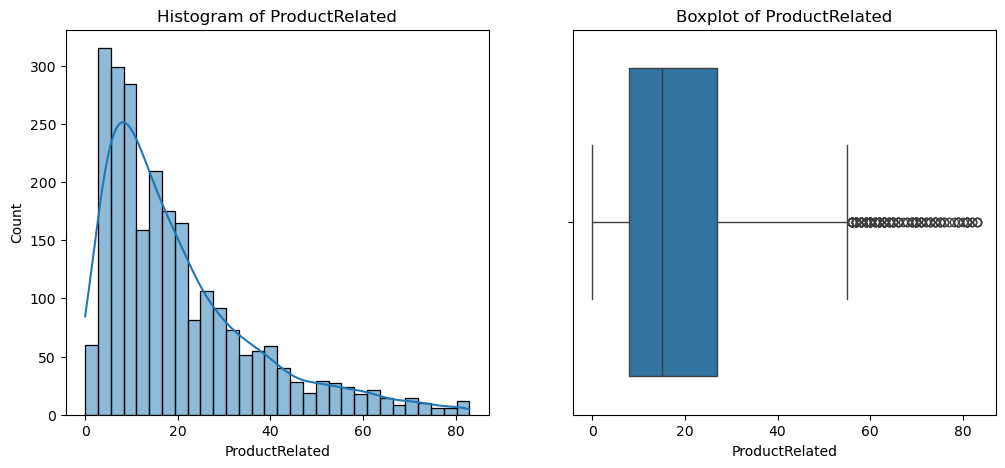

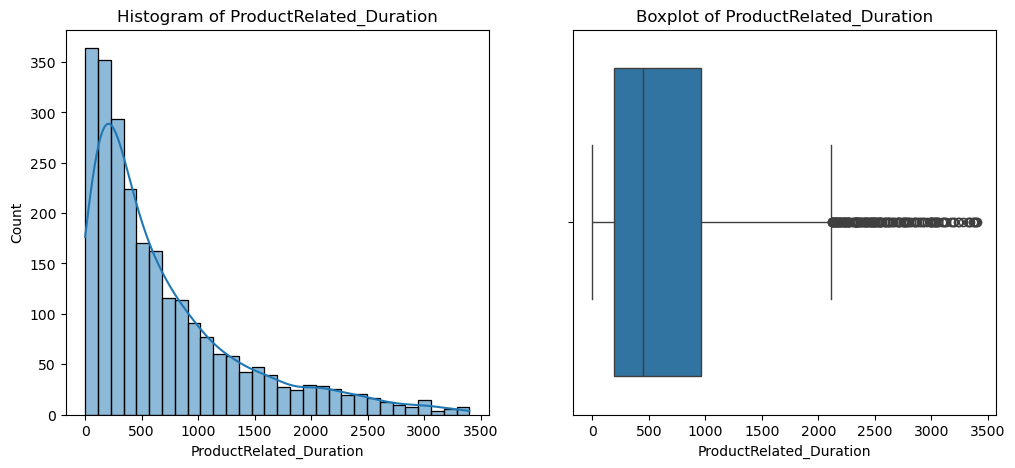

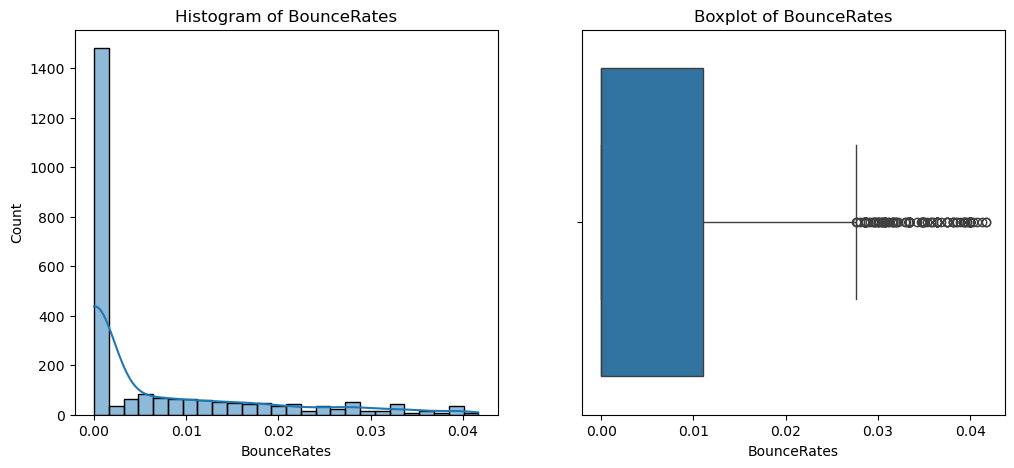

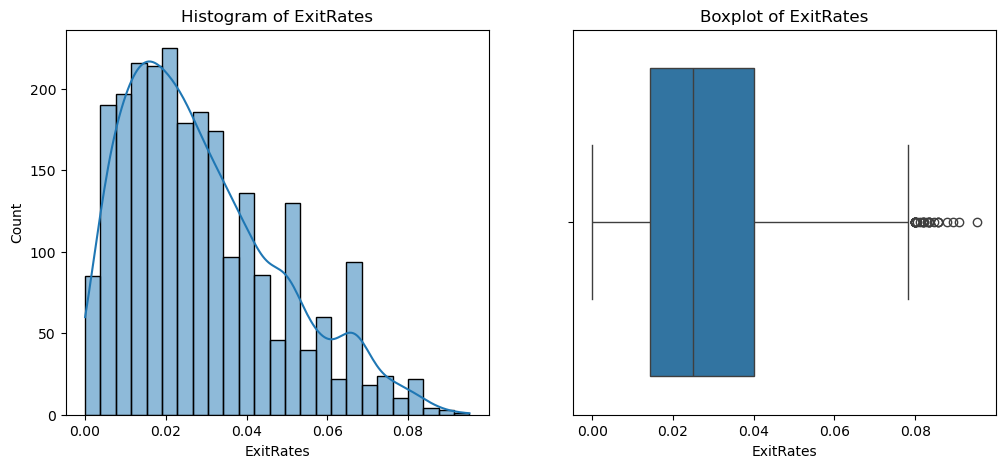

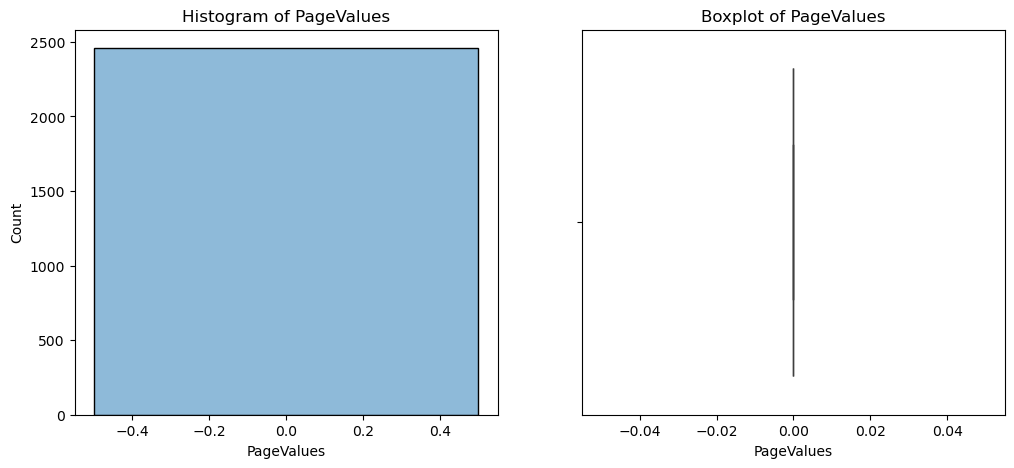

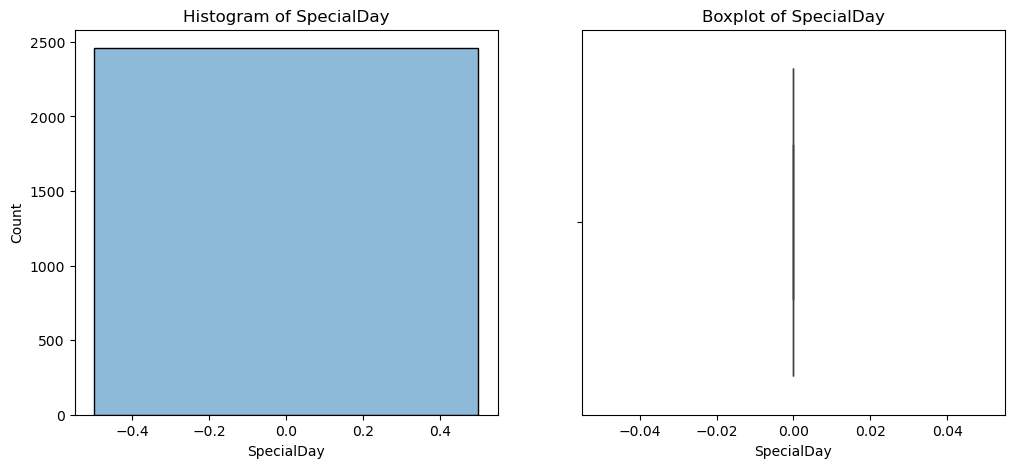

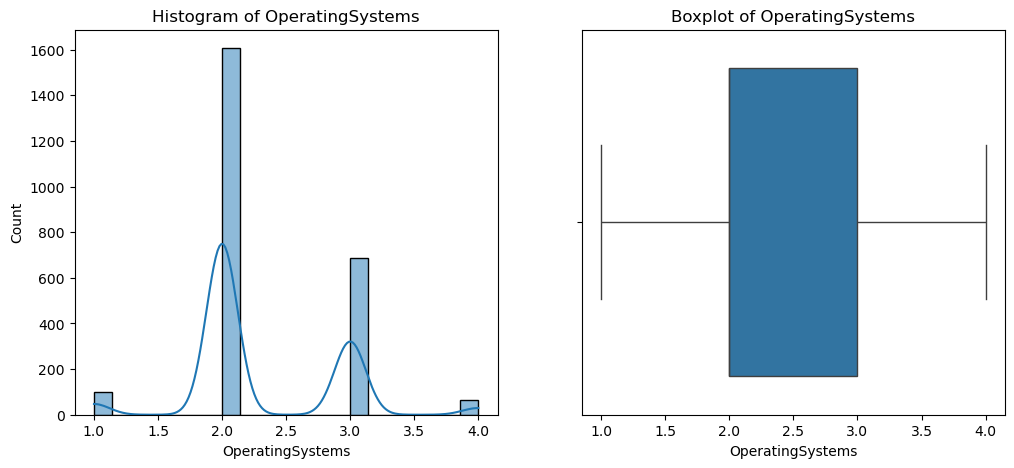

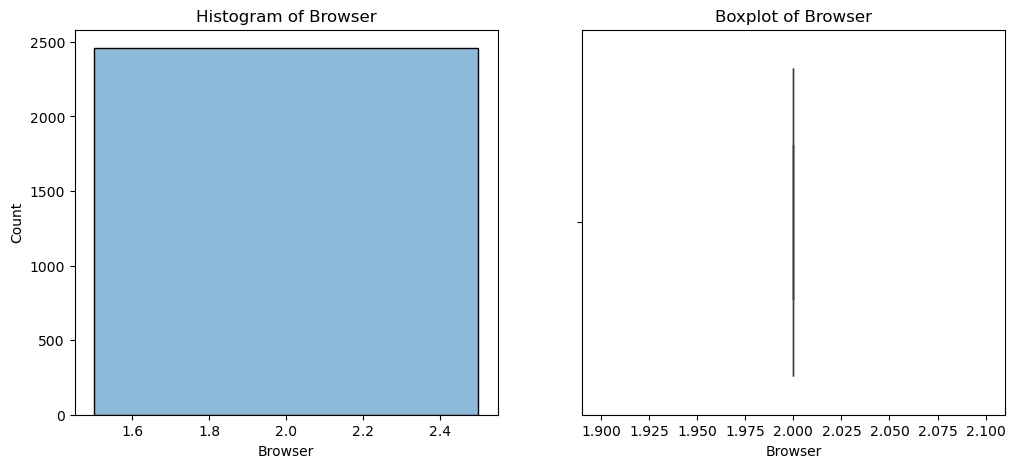

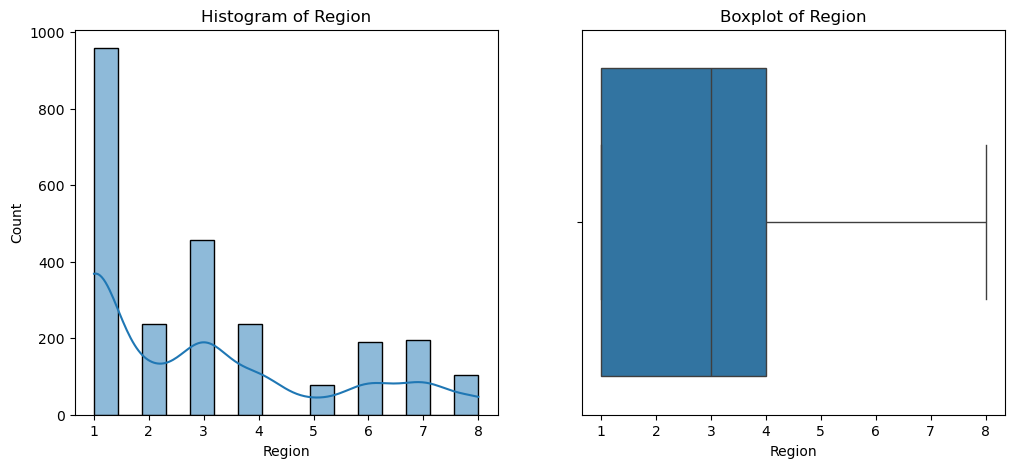

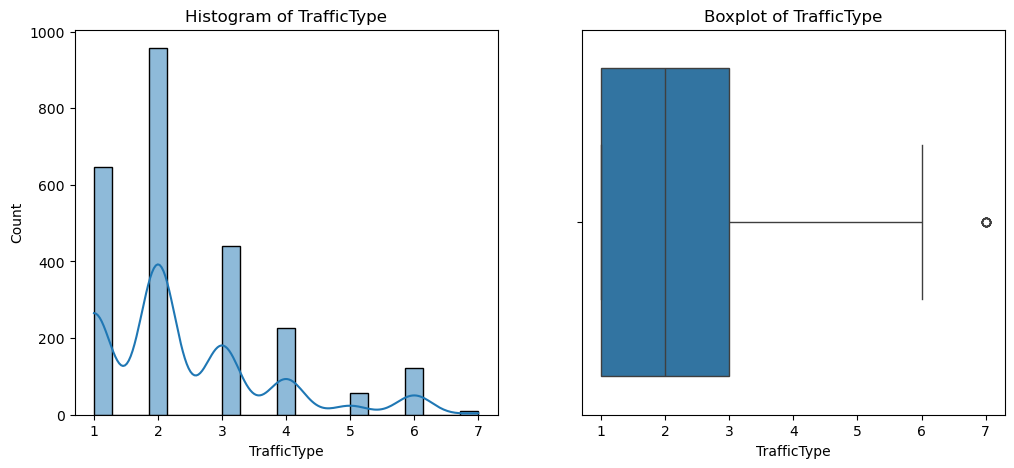

In [200]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_iqr_removed[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_iqr_removed[column])
    plt.title(f'Boxplot of {column}')

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>13.2 Z-SCORE METHOD</i></p>    
</div>

In [202]:
from scipy import stats

# Select numerical columns in your dataset
num_cols = data.select_dtypes(include=['number']).columns

# Compute the Z-scores for the numerical columns
z_scores = stats.zscore(data[num_cols])

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers_z = (z_scores > 3) | (z_scores < -3)

# Remove rows where any feature has a Z-score > 3 or < -3
data_z_removed = data[(~outliers_z).all(axis=1)]

# Print the shapes before and after removing outliers
print(f"The shape of the dataset before removing outliers is {data.shape}")
print(f"The shape of the dataset after removing outliers is {data_z_removed.shape}")


The shape of the dataset before removing outliers is (12205, 18)
The shape of the dataset after removing outliers is (9566, 18)


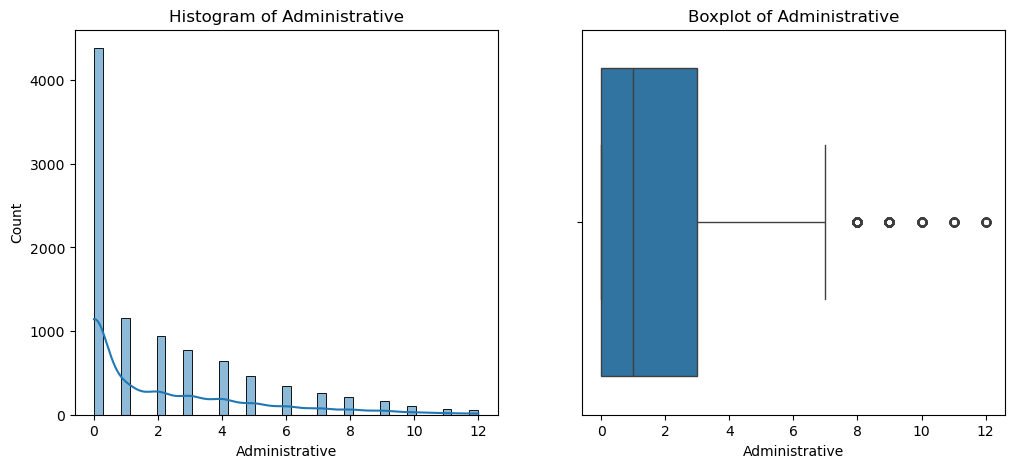

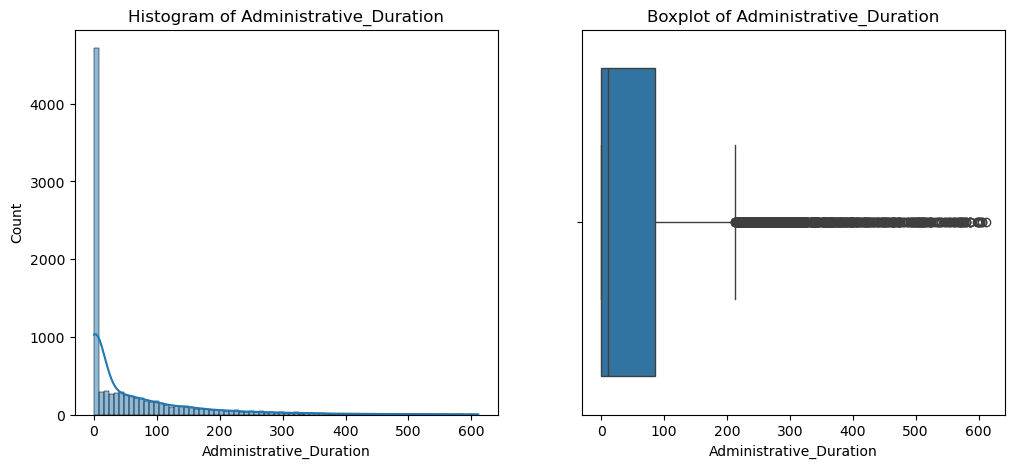

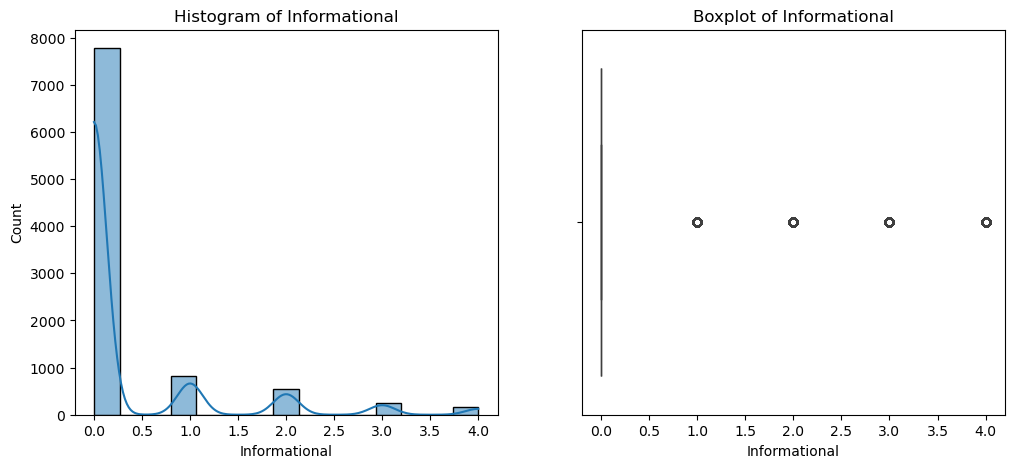

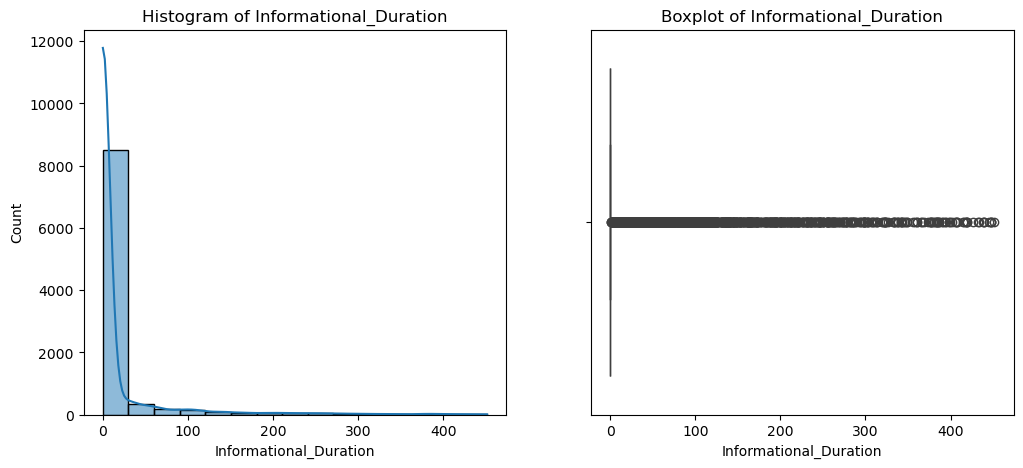

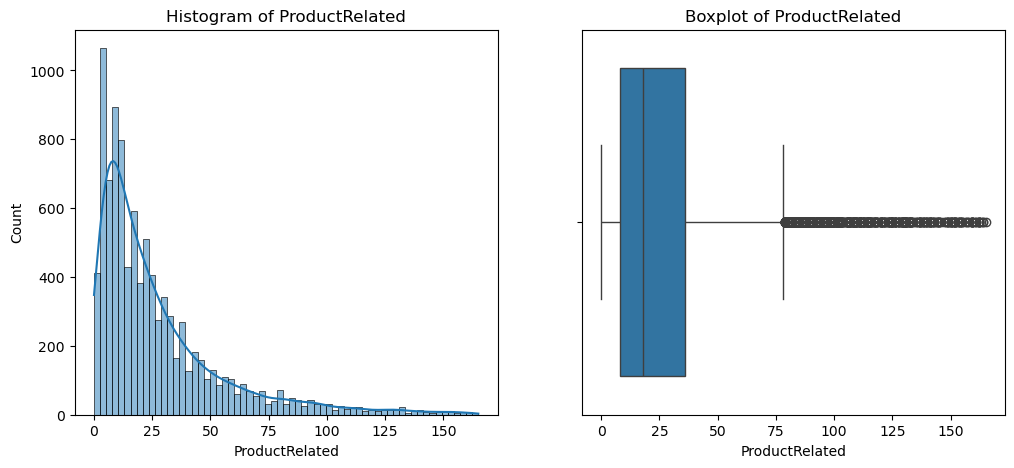

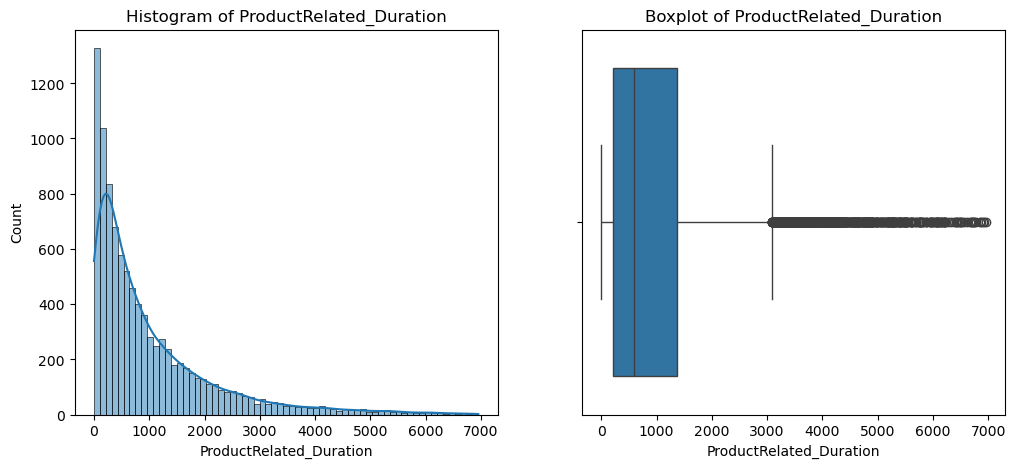

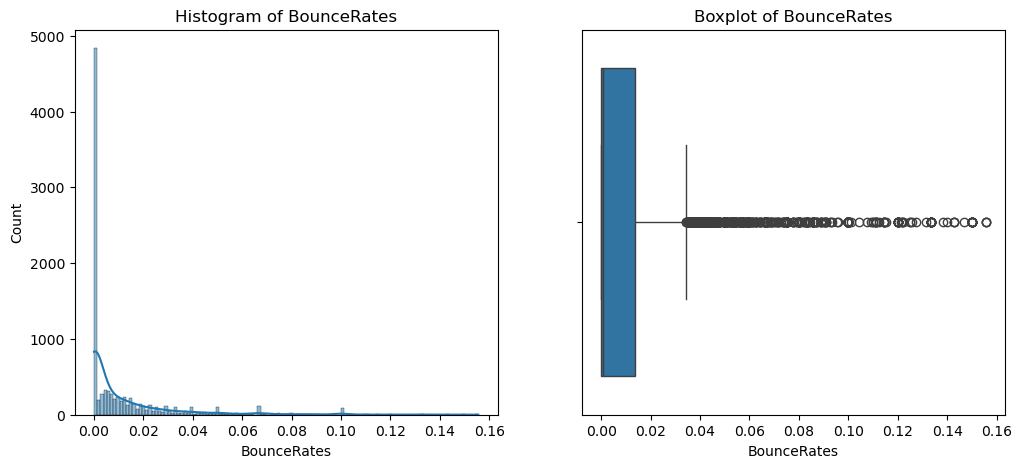

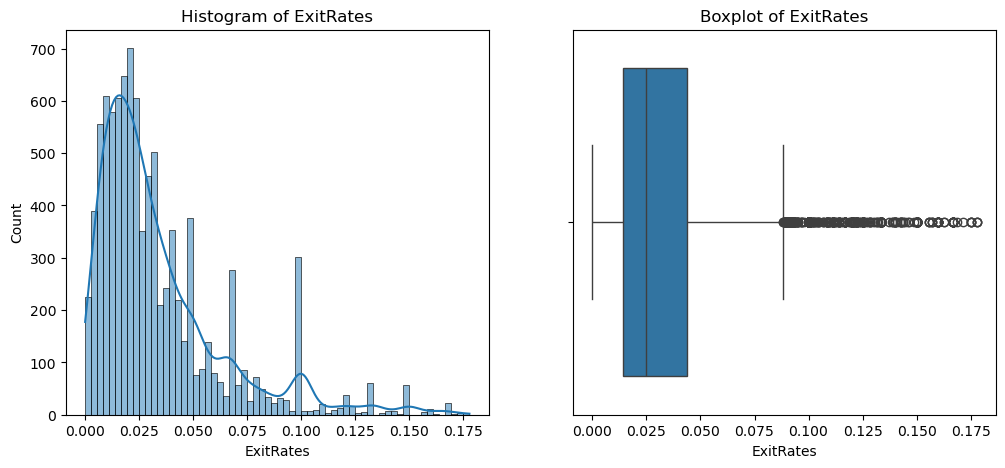

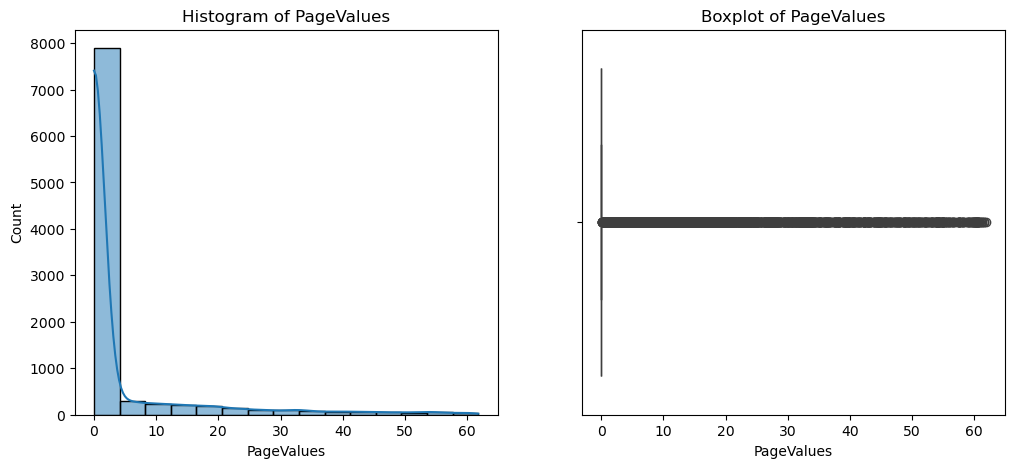

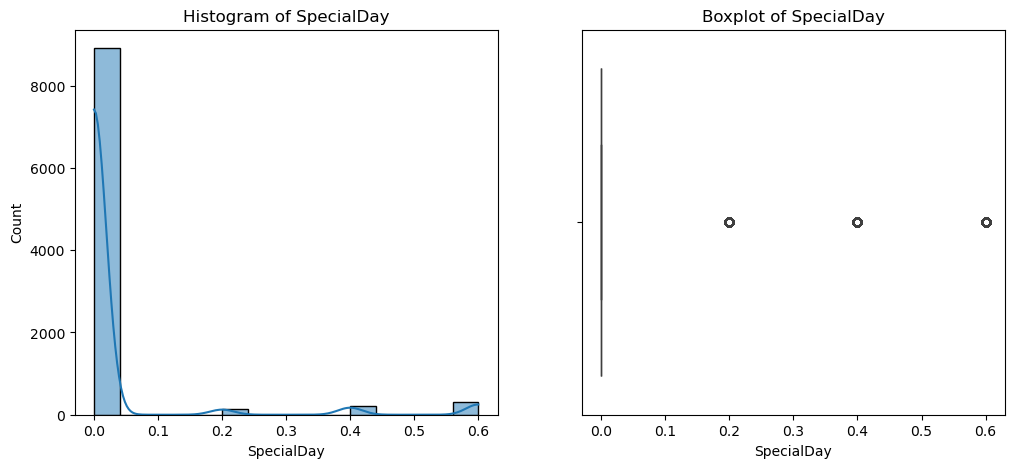

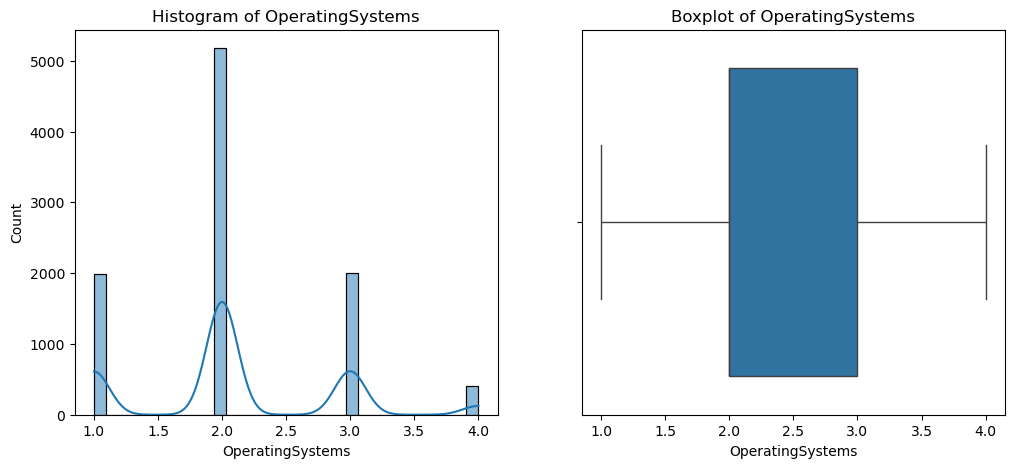

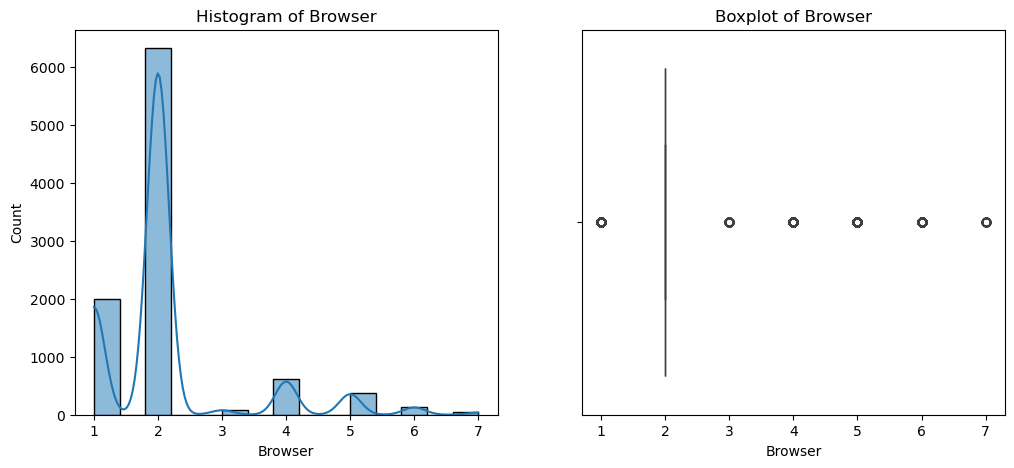

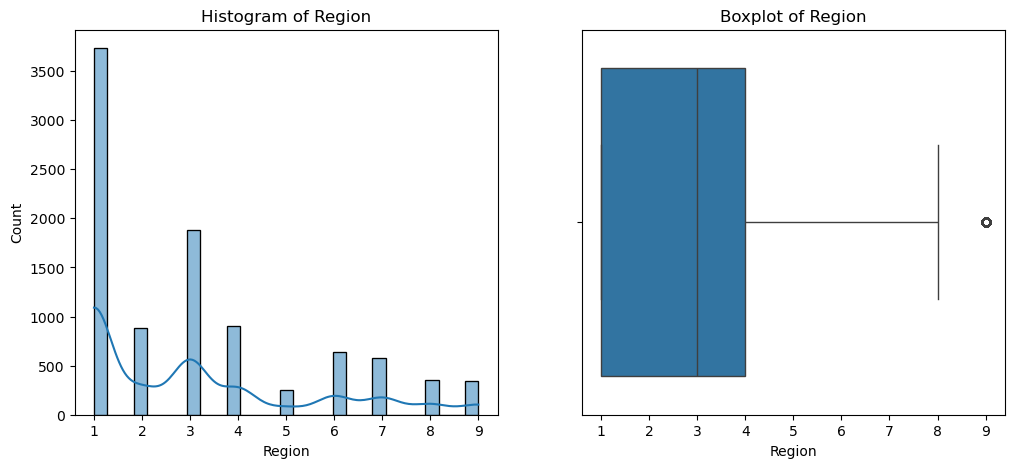

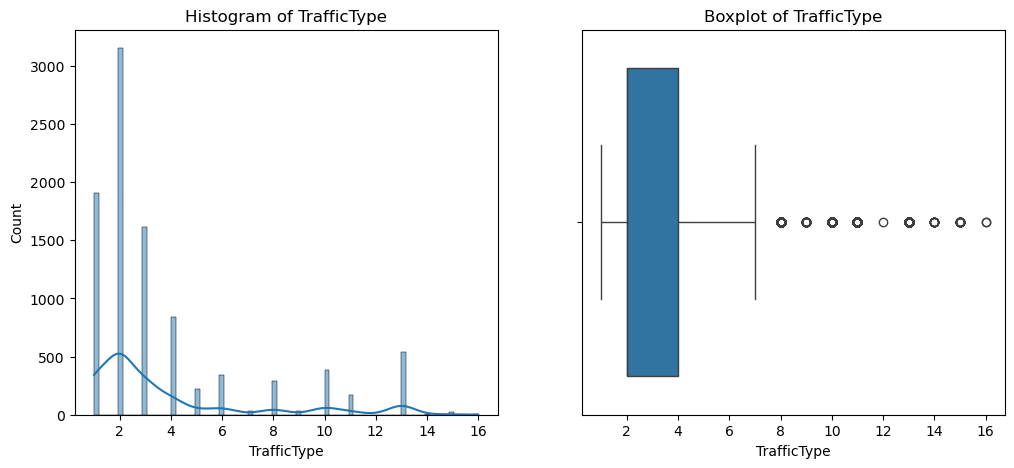

In [203]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_z_removed[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_z_removed[column])
    plt.title(f'Boxplot of {column}')

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>Given that both methods yielded significantly different outcomes, I have chosen to use the Z-score method for outlier removal</p>    
</div>

In [205]:
# Remove outliers using Z-score method
data = data[(np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]


In [206]:
data.shape

(9566, 18)

In [207]:
data.select_dtypes(include="number").skew()

Administrative             1.436467
Administrative_Duration    2.381375
Informational              2.659650
Informational_Duration     4.716081
ProductRelated             1.985515
ProductRelated_Duration    2.005338
BounceRates                3.055984
ExitRates                  1.798244
PageValues                 3.140742
SpecialDay                 4.006715
OperatingSystems           0.431166
Browser                    1.943640
Region                     0.988209
TrafficType                1.690756
dtype: float64

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>Despite applying the Z-score method to remove outliers, the data remains skewed and contains outliers. To address this, log transformation will be applied to positively skewed features, while square root transformation will be used for negatively skewed features.</p>    
</div>

In [265]:
# Display initial data shape and skewness
print("Initial data shape:", data.shape)
skewness = data.select_dtypes(include='number').skew()
print("\nSkewness before transformation:\n", skewness)

# Function to transform skewed data
def transform_skewed_data(df, column):
    skewness_value = df[column].skew()

    if skewness_value > 0.5:  # Positive skew
        df[column] = np.log1p(df[column])  # Apply log transformation
        print(f"\nApplied log transformation on {column} (Skewness: {skewness_value})")
    elif skewness_value < -0.5:  # Negative skew
        df[column] = np.sqrt(df[column])  # Apply square root transformation
        print(f"\nApplied sqrt transformation on {column} (Skewness: {skewness_value})")
    else:
        print(f"\nNo transformation applied on {column} (Skewness: {skewness_value})")

    return df


# Transform the numerical columns based on their skewness
for col in numeric_columns:
    data = transform_skewed_data(data, col)

# Display the skewness after transformation
skewness_after = data.select_dtypes(include='number').skew()
print("\nSkewness after transformation:\n", skewness_after)

Initial data shape: (9566, 18)

Skewness before transformation:
 Administrative             1.436467
Administrative_Duration    2.381375
Informational              2.659650
Informational_Duration     4.716081
ProductRelated             1.985515
ProductRelated_Duration    2.005338
BounceRates                3.055984
ExitRates                  1.798244
PageValues                 3.140742
SpecialDay                 4.006715
OperatingSystems           0.431166
Browser                    1.943640
Region                     0.988209
TrafficType                1.690756
dtype: float64

Applied log transformation on Administrative (Skewness: 1.436466805261061)

Applied log transformation on Administrative_Duration (Skewness: 2.3813753461806018)

Applied log transformation on Informational (Skewness: 2.6596501924507905)

Applied log transformation on Informational_Duration (Skewness: 4.716081343373695)

Applied log transformation on ProductRelated (Skewness: 1.9855150058594606)

Applied log tran

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p> After applying the log transformation, some features still exhibited skewness and outliers. To address this, the Box-Cox transformation was attempted; however, it did not yield significant improvements. As a result, the Yeo-Johnson transformation was subsequently applied.</p>
</div>

In [273]:
# Display initial data shape and skewness
print("Initial data shape:", data.shape)
print("\nInitial skewness:\n", data.select_dtypes(include='number').skew())

# Function to apply transformations on positively skewed features
def apply_transformations(df, column):
    current_skewness = df[column].skew()


    # Apply Yeo-Johnson transformation if skewness is still high
    current_skewness = df[column].skew()
    if current_skewness > 1:
        print(f"\nApplying Yeo-Johnson transformation on {column} (Skewness: {current_skewness})")
        pt = PowerTransformer(method='yeo-johnson')
        df[column] = pt.fit_transform(df[[column]])

    # Check skewness after transformation
    new_skewness = df[column].skew()
    print(f"\nNew skewness for {column}: {new_skewness}")

    return df

# List of numerical columns to check for transformations
columns_to_transform = ['Informational', 'Informational_Duration', 'BounceRates',
                         'ExitRates', 'PageValues', 'SpecialDay']

# Apply transformations to each specified column
for col in columns_to_transform:
    data = apply_transformations(data, col)

# Display final skewness after all transformations
print("\nFinal skewness after transformations:\n", data.select_dtypes(include='number').skew())



Initial data shape: (9566, 18)

Initial skewness:
 Administrative             0.485109
Administrative_Duration    0.181044
Informational              1.608253
Informational_Duration     1.788462
ProductRelated            -0.080507
ProductRelated_Duration   -0.865223
BounceRates                0.742031
ExitRates                  0.227811
PageValues                 1.524487
SpecialDay                 3.424362
OperatingSystems           0.431166
Browser                    0.893459
Region                     0.379002
TrafficType                0.849476
dtype: float64

Applying Yeo-Johnson transformation on Informational (Skewness: 1.6082531180774124)

New skewness for Informational: 1.608252817527138

Applying Yeo-Johnson transformation on Informational_Duration (Skewness: 1.788461956552082)

New skewness for Informational_Duration: 1.7884617988315614

New skewness for BounceRates: 0.7420307988908452

New skewness for ExitRates: 0.2278114320031456

Applying Yeo-Johnson transformation on Pa

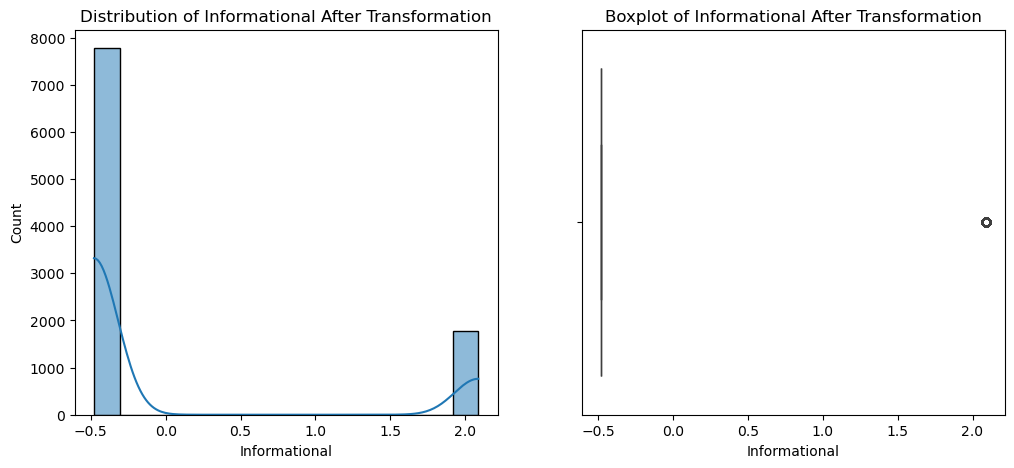

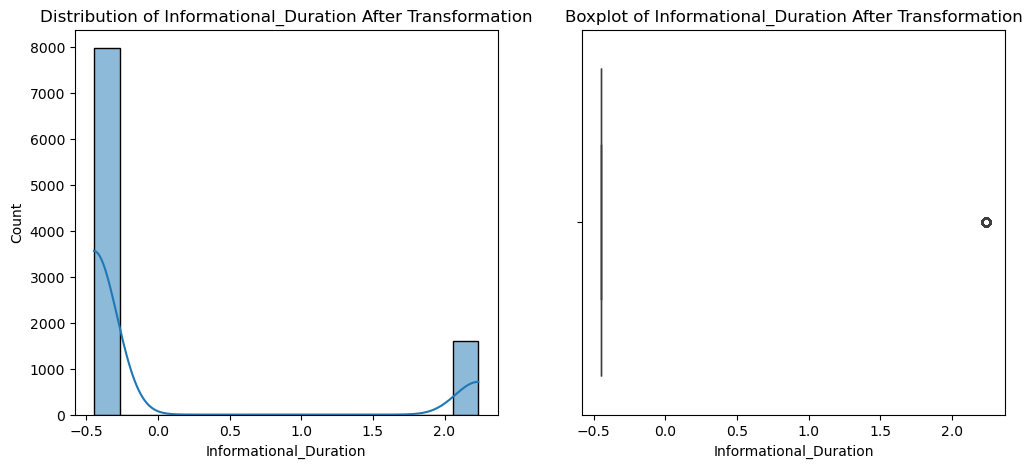

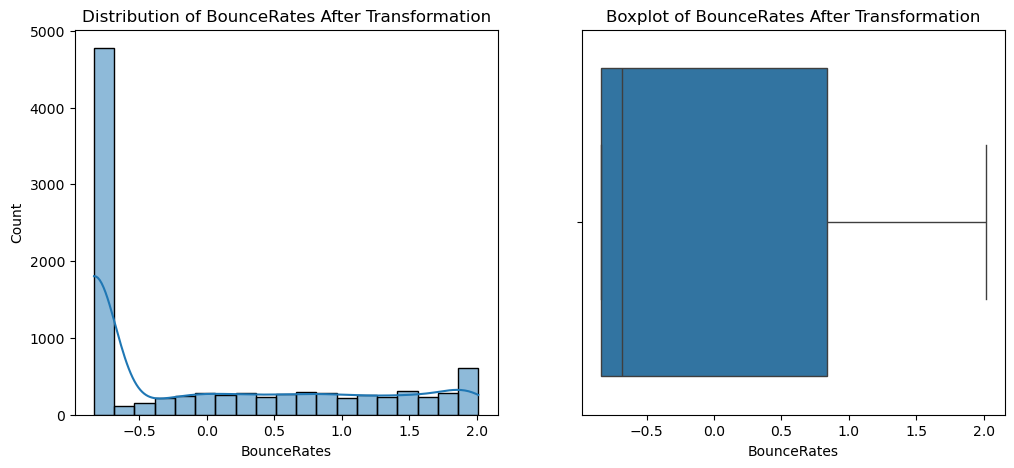

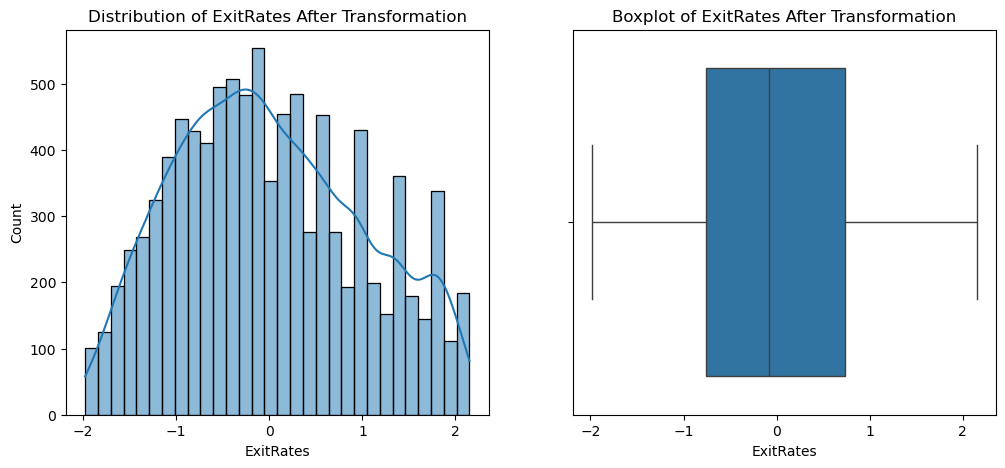

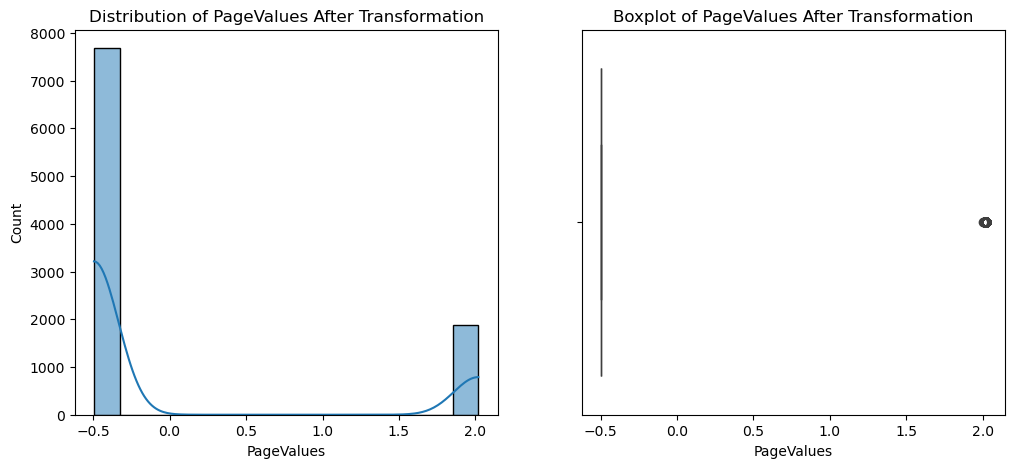

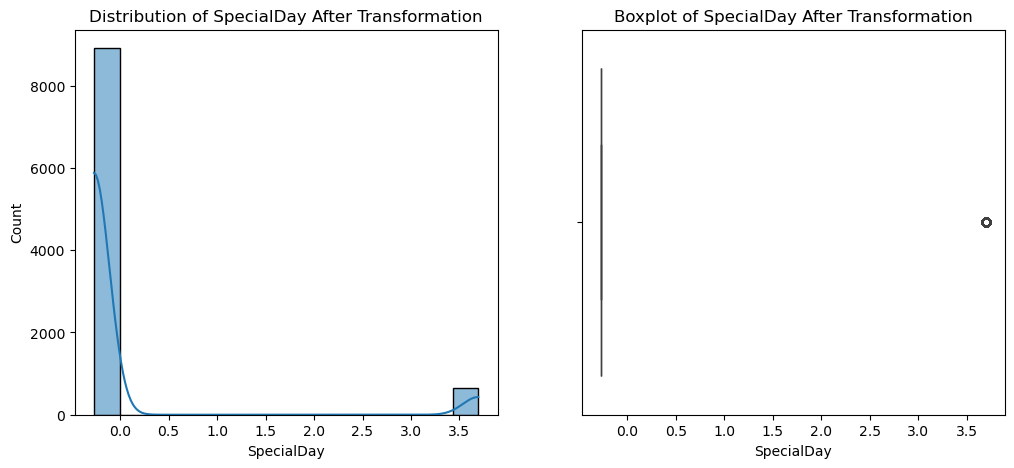

In [275]:
# Visualize distributions before and after transformations for selected columns
for col in columns_to_transform:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col} After Transformation')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} After Transformation')

    plt.show()

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>14. EXPLORATORY DATA ANALYSIS (EDA) </b>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>14.1 HISTOGRAM FOR NUMERICAL FEATURES </i></p>    
</div>

Initial data shape: (9566, 18)
       Administrative  Administrative_Duration  Informational  \
count     9566.000000              9566.000000   9.566000e+03   
mean         0.771494                 2.269625   1.760387e-16   
std          0.812671                 2.271693   1.000052e+00   
min          0.000000                 0.000000  -4.791273e-01   
25%          0.000000                 0.000000  -4.791273e-01   
50%          0.693147                 2.397895  -4.791273e-01   
75%          1.386294                 4.454347  -4.791273e-01   
max          2.564949                 6.416787   2.087151e+00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            9.566000e+03     9566.000000              9566.000000   
mean            -5.518851e-16        2.911837                 6.198881   
std              1.000052e+00        0.956692                 1.404598   
min             -4.473258e-01        0.000000                 0.000000   
25%          

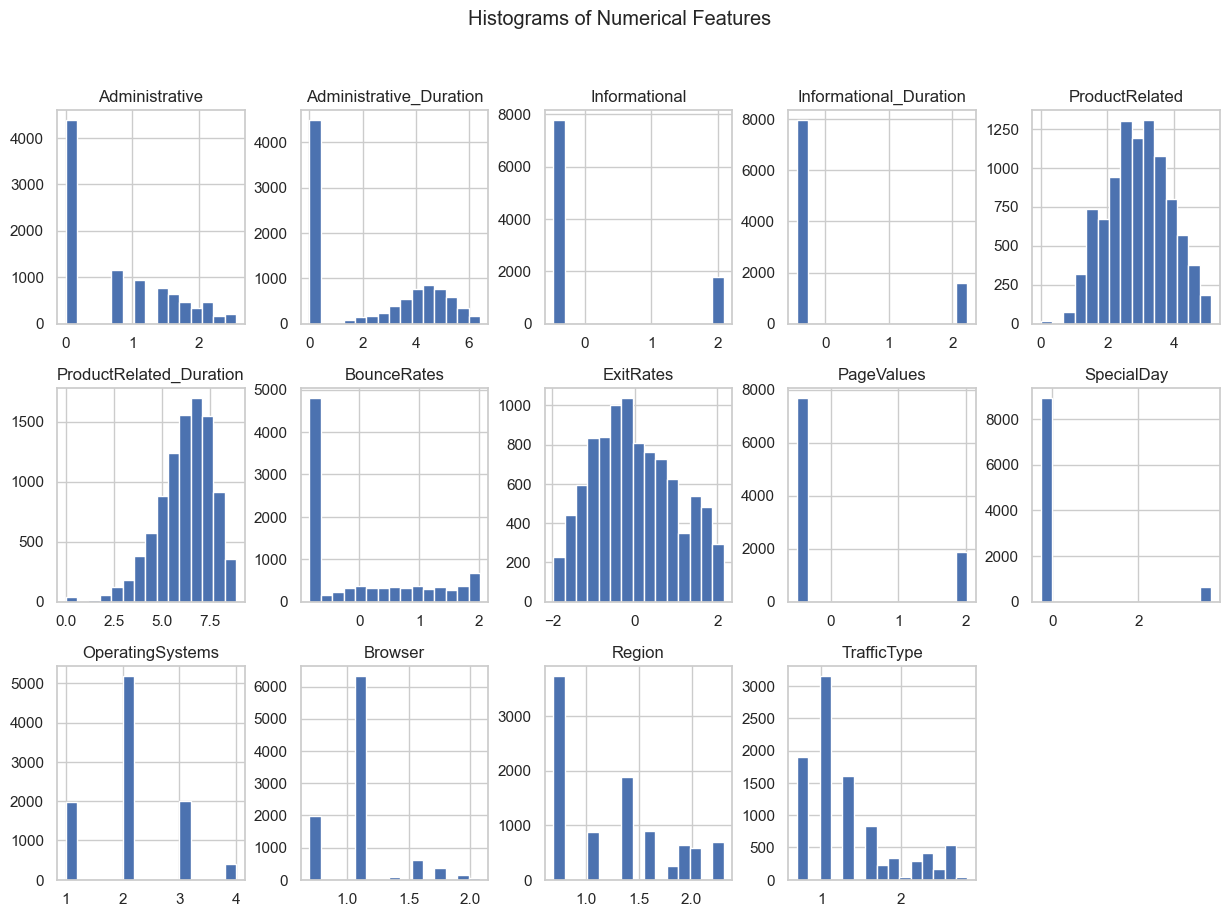

In [279]:
# Display initial data shape and summary statistics
print("Initial data shape:", data.shape)
print(data.describe())

# Display initial skewness
print("Initial skewness:\n", data.select_dtypes(include='number').skew())

# Set up the visualisation style
sns.set(style="whitegrid")

## 1. Histograms for all numerical features
data.select_dtypes(include='number').hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>14.1 BOXPLOTS OF NUMERICAL FEATURES </i></p>    
</div>

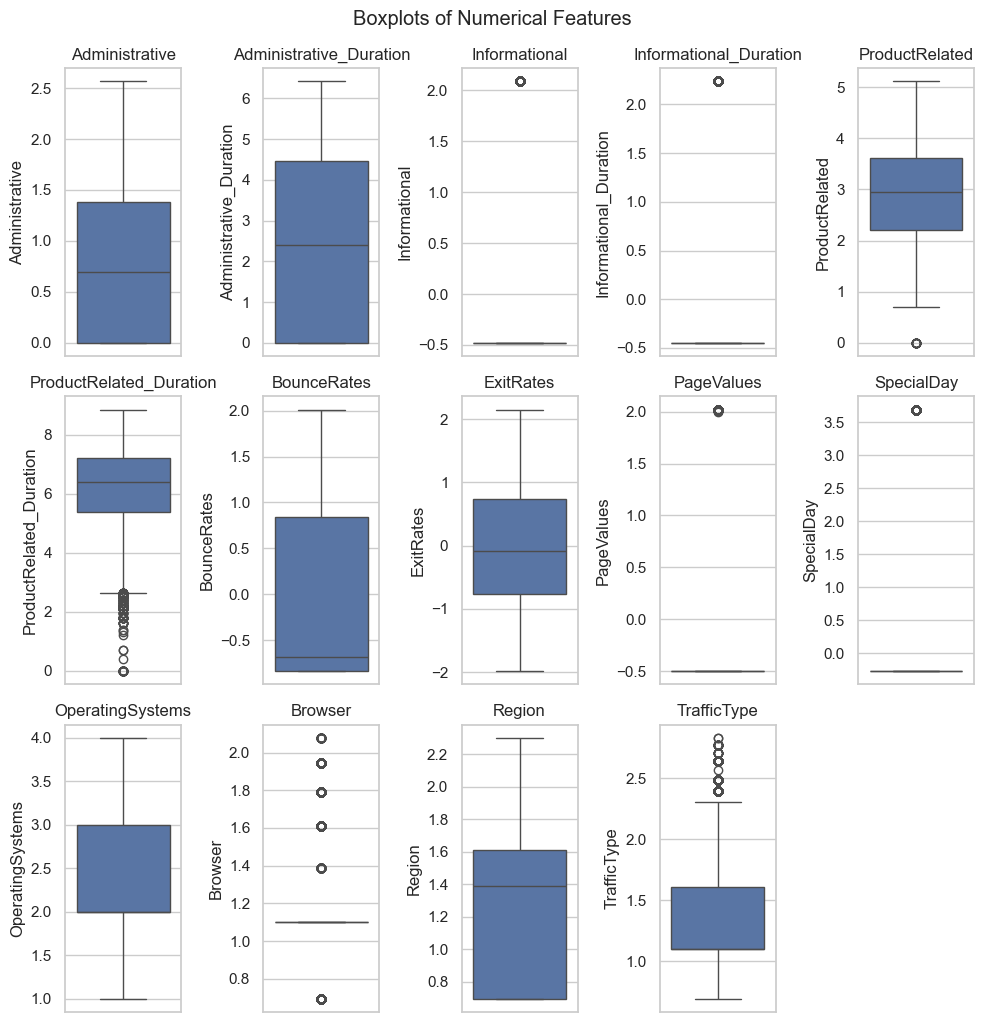

In [281]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>14.3 HEATMAP OF FEATURES CORRELATIONS </i></p>    
</div>

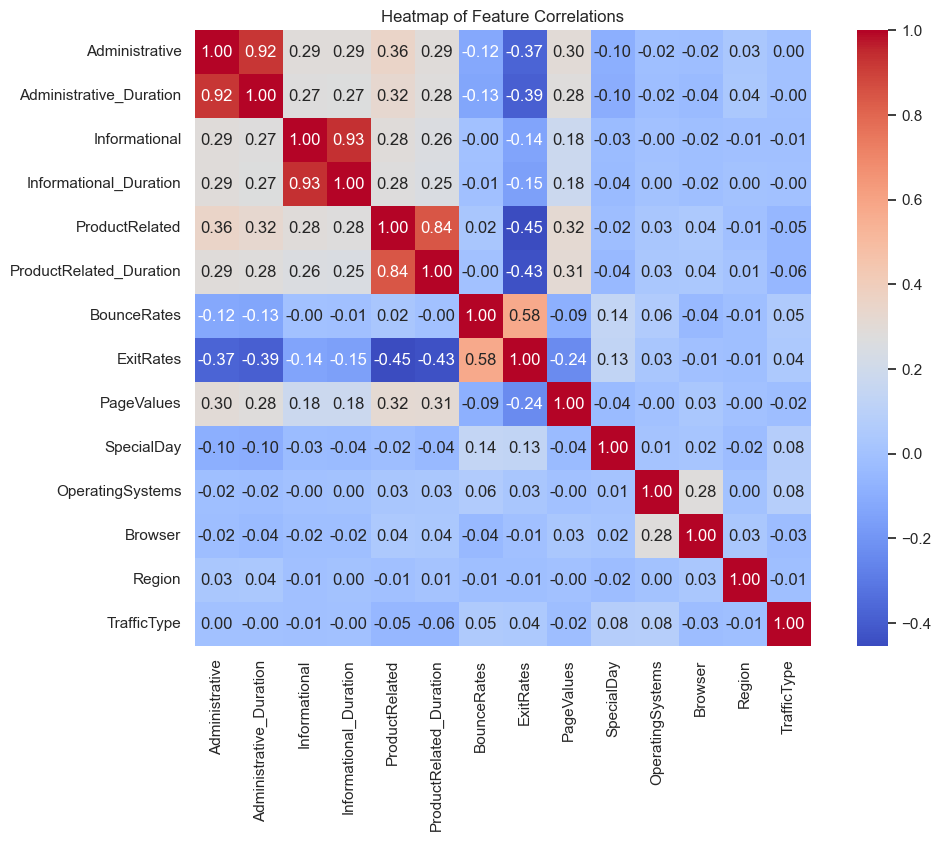

In [287]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p> A heatmap of feature correlations provides insights into the relationships between numerical features. For example, features such as 'Administrative' and 'Administrative_Duration,' as well as 'ProductRelated_Duration' and 'ProductRelated,' exhibit a strong positive correlation. This suggests that longer durations spent on product-related pages are associated with increased product interactions.</p>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><i>14.4 COUNT PLOT FOR CATEGORICAL VARIABLES </i></p>    
</div>

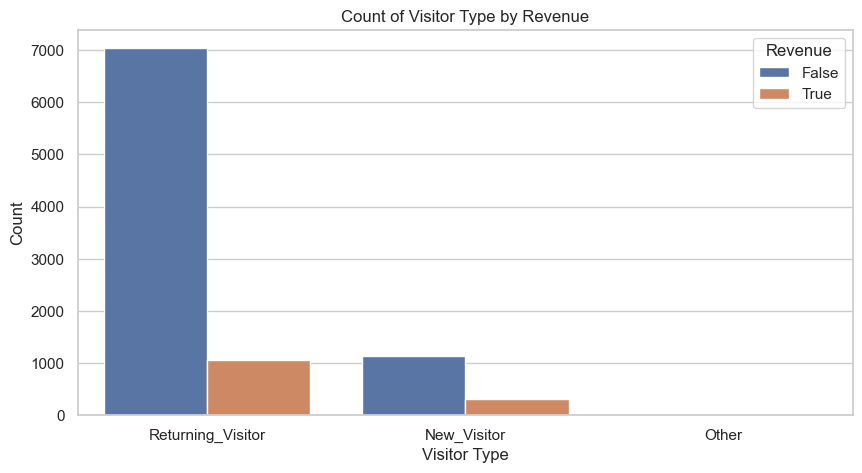

In [293]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='VisitorType', hue='Revenue')
plt.title('Count of Visitor Type by Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue', loc='upper right')
plt.show()

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p> The 'VisitorType' feature offers valuable insights into the distinction between returning and new visitors, which may influence conversion rates. Despite the significantly higher count of returning visitors, the revenue generated from this group remains low.</p>
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>15. FEATURE ENGINEERING</b>
</div>

In [303]:
cat_data = data.select_dtypes(include="object")
bool_data = data.select_dtypes(include="bool").drop(columns='Revenue')
num_data = data.select_dtypes(include="number")
# 1. Binary Encoding for Boolean Features

# Perform binary encoding for the Weekend feature without using map
bool_data['Weekend'] = bool_data['Weekend'].replace({'TRUE': 1, 'FALSE': 0}).astype(int)


# Display encoded boolean data
print("Encoded boolean data:\n", bool_data.head())

# 2. One-Hot Encoding for Categorical Features
cat_data_encoded = pd.get_dummies(cat_data, drop_first=True,dtype=int)

# Display encoded categorical data
print("\nEncoded categorical data:\n", cat_data_encoded.head())

# 3. Combine Encoded DataFrames
encoded_data = pd.concat([num_data,bool_data, cat_data_encoded], axis=1)

# Display final encoded dataset shape
print("\nFinal encoded dataset shape:", encoded_data.shape)

Encoded boolean data:
    Weekend
1        0
3        0
4        1
5        0
9        0

Encoded categorical data:
    Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
1          0          1          0           0          0          0   
3          0          1          0           0          0          0   
4          0          1          0           0          0          0   
5          0          1          0           0          0          0   
9          0          1          0           0          0          0   

   Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
1          0          0          0                  0   
3          0          0          0                  0   
4          0          0          0                  0   
5          0          0          0                  0   
9          0          0          0                  0   

   VisitorType_Returning_Visitor  
1                              1  
3                              1  
4 

In [305]:
encoded_data['Revenue'] = data['Revenue'].values

In [307]:
encoded_data['Revenue'].value_counts()

Revenue
False    8193
True     1373
Name: count, dtype: int64

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p> The dataset exhibits an imbalance between the 'Revenue' classes, with 8,193 instances labeled as FALSE (no purchase) and 1,373 instances labeled as TRUE (purchase). This imbalance may lead to model bias towards predicting the majority class. To address this, SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance the data.</p>
</div>

In [311]:
# Display initial data shape and class distribution
print("Initial data shape:", encoded_data.shape)
print("\nClass distribution of Revenue:\n", encoded_data['Revenue'].value_counts())

# Step 1: Separate the features (X) and target (y)
X = encoded_data.drop('Revenue', axis=1)  # Features excluding the target
y = encoded_data['Revenue']  # Target column

# Apply SMOTE first to balance the classes, you can change this line in accordance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Convert the resampled data back to a DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Revenue'])

# Step 5: Optionally, combine the resampled features and target back into a single DataFrame
encoded_data= pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Check the new class distribution to ensure balance
print(encoded_data['Revenue'].value_counts())

Initial data shape: (9566, 27)

Class distribution of Revenue:
 Revenue
False    8193
True     1373
Name: count, dtype: int64
Revenue
False    8193
True     8193
Name: count, dtype: int64


In [313]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16386 entries, 0 to 16385
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 16386 non-null  float64
 1   Administrative_Duration        16386 non-null  float64
 2   Informational                  16386 non-null  float64
 3   Informational_Duration         16386 non-null  float64
 4   ProductRelated                 16386 non-null  float64
 5   ProductRelated_Duration        16386 non-null  float64
 6   BounceRates                    16386 non-null  float64
 7   ExitRates                      16386 non-null  float64
 8   PageValues                     16386 non-null  float64
 9   SpecialDay                     16386 non-null  float64
 10  OperatingSystems               16386 non-null  int64  
 11  Browser                        16386 non-null  float64
 12  Region                         16386 non-null 

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>15. FEATURE SELECTION</b>
</div>

In [315]:
# Assume X is your feature set and y is your target variable
x = encoded_data.drop('Revenue', axis=1)  # Features excluding the target
y = encoded_data['Revenue']  # Target column
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                          Feature  Importance
8                      PageValues    0.351986
7                       ExitRates    0.077162
5         ProductRelated_Duration    0.077024
4                  ProductRelated    0.062898
13                    TrafficType    0.059228
0                  Administrative    0.045632
6                     BounceRates    0.044949
12                         Region    0.042493
1         Administrative_Duration    0.041423
11                        Browser    0.028704
25  VisitorType_Returning_Visitor    0.023376
21                      Month_Nov    0.022034
2                   Informational    0.019943
20                      Month_May    0.019279
10               OperatingSystems    0.018989
3          Informational_Duration    0.014340
19                      Month_Mar    0.013746
15                      Month_Dec    0.010945
14                        Weekend    0.010373
22                      Month_Oct    0.004310
23                      Month_Sep 

In [317]:
# Set a threshold (example: 0.0226)
threshold = 0.0226

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
X_selected = x[selected_features['Feature']]

Selected Features:
                          Feature  Importance
8                      PageValues    0.351986
7                       ExitRates    0.077162
5         ProductRelated_Duration    0.077024
4                  ProductRelated    0.062898
13                    TrafficType    0.059228
0                  Administrative    0.045632
6                     BounceRates    0.044949
12                         Region    0.042493
1         Administrative_Duration    0.041423
11                        Browser    0.028704
25  VisitorType_Returning_Visitor    0.023376


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>15. SPLIT DATA INTO TRAINING AND TESTING SET</b>
</div>

In [322]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [324]:
x_train.shape

(13108, 11)

In [326]:
x_test.shape

(3278, 11)

In [328]:
y_train.shape

(13108,)

In [330]:
y_test.shape

(3278,)

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>15. FEATURE SCALING</b>
</div>

In [334]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)